Data gathering

In [9]:
import pandas as pd
import msoffcrypto
import io

def load_encrypted_excel(file_path: str, password: str) -> pd.DataFrame:
    if password:
        with open(file_path, 'rb') as f:
            office_file = msoffcrypto.OfficeFile(f)
            office_file.load_key(password=password)
            decrypted = io.BytesIO()
            office_file.decrypt(decrypted)
            decrypted.seek(0)
            return pd.read_excel(decrypted)
    else:
        # load unencrypted file directly
        return pd.read_excel(file_path)

# File configurations
files = [
    # Core Client & FNA Process Tables
    {"name": "client",                      "path": "client.xlsx",                      "password": "_XlN@a9)EVy1"},
    {"name": "provider",                    "path": "provider.xlsx",                    "password": "unT4d4GO#dX("},
    {"name": "emfc2fna",                    "path": "emfc2fna.xlsx",                    "password": "dQq9T%pC^?22"},
    {"name": "emfc2personalinformation",    "path": "emfc2personalinformation.xlsx",    "password": "ZqYmaFgC@Zv3"},
    {"name": "emfc2",                       "path": "emfc2.xlsx",                       "password": "79GYEd%l(2Bf"},
    {"name": "EMFC2Assets",                 "path": "EMFC2Assets.xlsx",                 "password": "!suNZ=%YA13k"},
    {"name": "emfc2portofolioinsurance",    "path": "emfc2portofolioinsurance.xlsx",    "password": "BcxM>wz*(hxF"},

    # Product & Solution Workflow
    {"name": "emfc2productsolution",        "path": "emfc2productsolution.xlsx",        "password": "@OFn7oA5!Joe"},

    # Product & Category Lookup Tables
    {"name": "ProductMainPlan",             "path": "ProductMainPlan.xlsx",             "password": ")XQ4ZDssowrA"},

    {"name": "ProductMainPlan_Labeled",     "path": "ProductMainPlan_Labeled.xlsx",     "password": None}
]

# Load all datasets into memory
datasets = {}

print("=== LOADING ALL DATASETS ===")
for file in files:
    print(f"{file['name']}...", end=" ")
    try:
        datasets[file['name']] = load_encrypted_excel(file["path"], file["password"])
        shape = datasets[file['name']].shape
        print(f"({shape[0]:,} rows, {shape[1]} columns)")
    except Exception as e:
        print(f"✗ Error: {e}")

print(f"\nSuccessfully loaded {len(datasets)} datasets")
print("Available datasets:", list(datasets.keys()))


=== LOADING ALL DATASETS ===
client... (45,688 rows, 49 columns)
provider... (128 rows, 21 columns)
emfc2fna... (51,772 rows, 31 columns)
emfc2personalinformation... (52,305 rows, 37 columns)
emfc2... (51,769 rows, 8 columns)
EMFC2Assets... (50,500 rows, 39 columns)
emfc2portofolioinsurance... (27,437 rows, 25 columns)
emfc2productsolution... (43,501 rows, 25 columns)
ProductMainPlan... (1,532 rows, 22 columns)
ProductMainPlan_Labeled... (1,532 rows, 12 columns)

Successfully loaded 10 datasets
Available datasets: ['client', 'provider', 'emfc2fna', 'emfc2personalinformation', 'emfc2', 'EMFC2Assets', 'emfc2portofolioinsurance', 'emfc2productsolution', 'ProductMainPlan', 'ProductMainPlan_Labeled']


Specify column headers for each dataset

In [11]:
print("=== COLUMN HEADERS FOR EACH DATASET ===")
for name, df in datasets.items():
    print(f"📄 Dataset: {name}")
    print(f"🧾 Columns ({len(df.columns)}):")
    for col in df.columns:
        print(f"  - {col} ({df[col].dtype})")
    print("-" * 20)


=== COLUMN HEADERS FOR EACH DATASET ===
📄 Dataset: client
🧾 Columns (49):
  - # (int64)
  - ClientId (object)
  - ClientName (object)
  - ClientMobileNumber (object)
  - ClientMNVerified (bool)
  - ClientMNVeriCode (float64)
  - ClientMNVeriCodeTime (datetime64[ns])
  - ClientEmail (object)
  - ClientContactPreferences (object)
  - ClientGender (object)
  - ClientDOB (datetime64[ns])
  - ClientCPFContributionCategoryId (object)
  - IDNumber (object)
  - Nationality (object)
  - SpokenLanguage (object)
  - WrittenLanguage (object)
  - Education (object)
  - EmploymentStatus (object)
  - Occupation (object)
  - MaritalStatus (object)
  - PrimaryAddress (object)
  - CorrespondingAddress (object)
  - IncomeRange (object)
  - AccompaniedbyTrustedIndividual (float64)
  - ClientInvitedDate (datetime64[ns])
  - ClientStatus (object)
  - RiskProfile (object)
  - RiskProfileSubmissionDate (datetime64[ns])
  - CKAProfile (object)
  - CARProfile (object)
  - CKACARSubmissionDate (datetime64[ns])
 

In [14]:
"""
=== ENHANCED PHASE 1: DATA UNIFICATION WITH ADVANCED FEATURE ENGINEERING ===
Enhanced version with temporal features, behavioral scoring, and improved portfolio analysis
"""

import pandas as pd
import numpy as np
from datetime import datetime
import msoffcrypto
import io
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

print("=== ENHANCED UNIFIED DATASET CREATION ===")

def load_encrypted_excel(file_path: str, password: str) -> pd.DataFrame:
    """Load password-protected Excel files"""
    with open(file_path, 'rb') as f:
        office_file = msoffcrypto.OfficeFile(f)
        office_file.load_key(password=password)
        decrypted = io.BytesIO()
        office_file.decrypt(decrypted)
        decrypted.seek(0)
        return pd.read_excel(decrypted)

# Load all datasets
files = [
    {"name": "client", "path": "client.xlsx", "password": "_XlN@a9)EVy1"},
    {"name": "emfc2personalinformation", "path": "emfc2personalinformation.xlsx", "password": "ZqYmaFgC@Zv3"},
    {"name": "emfc2", "path": "emfc2.xlsx", "password": "79GYEd%l(2Bf"},
    {"name": "EMFC2Assets", "path": "EMFC2Assets.xlsx", "password": "!suNZ=%YA13k"},
    {"name": "emfc2portofolioinsurance", "path": "emfc2portofolioinsurance.xlsx", "password": "BcxM>wz*(hxF"},
    {"name": "emfc2fna", "path": "emfc2fna.xlsx", "password": "dQq9T%pC^?22"},  # Added FNA table
    {"name": "emfc2productsolution", "path": "emfc2productsolution.xlsx", "password": "@OFn7oA5!Joe"}  # Added for temporal features
]

datasets = {}
print("=== LOADING DATASETS ===")
for file in files:
    print(f"Loading {file['name']}...", end=" ")
    try:
        datasets[file['name']] = load_encrypted_excel(file["path"], file["password"])
        shape = datasets[file['name']].shape
        print(f"✓ ({shape[0]:,} rows, {shape[1]} columns)")
    except Exception as e:
        print(f"✗ Error: {e}")

def create_enhanced_unified_dataset(datasets):
    """Create unified dataset with enhanced feature engineering"""
    
    print("\n🚀 Starting enhanced dataset creation...")
    start_time = datetime.now()
    
    # Get base datasets
    client_df = datasets['client'].copy()
    personal_df = datasets['emfc2personalinformation'].copy()
    emfc2_df = datasets['emfc2'].copy()
    assets_df = datasets['EMFC2Assets'].copy()
    portfolio_df = datasets['emfc2portofolioinsurance'].copy()
    
    # Start with client as base
    unified_df = client_df.copy()
    
    # Add unique columns from personal info
    personal_unique_cols = ['PersonalInformationId', 'EMFC2FNAId', 'ClientAge', 'ClientRetrieval']
    personal_merge_cols = ['ClientId'] + personal_unique_cols
    available_personal_cols = [col for col in personal_merge_cols if col in personal_df.columns]
    
    unified_df = unified_df.merge(
        personal_df[available_personal_cols],
        on='ClientId',
        how='inner',
        suffixes=('', '_personal')
    )
    
    # Smart replacement for overlapping columns
    overlap_cols = [
        'ClientGender', 'IncomeRange', 'MaritalStatus', 'Education', 
        'EmploymentStatus', 'RiskProfile', 'CKAProfile', 'CARProfile',
        'Nationality', 'SpokenLanguage', 'WrittenLanguage'
    ]
    
    for col in overlap_cols:
        if col in personal_df.columns and col in unified_df.columns:
            personal_updates = personal_df[['ClientId', col]].dropna()
            
            if len(personal_updates) > 0:
                for _, row in personal_updates.iterrows():
                    client_id = row['ClientId']
                    new_value = row[col]
                    
                    mask = unified_df['ClientId'] == client_id
                    if mask.any():
                        null_mask = mask & unified_df[col].isnull()
                        if null_mask.any():
                            unified_df.loc[null_mask, col] = new_value
    
    # Add EMFC2Id bridge with temporal features
    emfc2_bridge = emfc2_df.sort_values(['ClientId', 'EMFCSubmitDate'], na_position='last')
    emfc2_bridge = emfc2_bridge.groupby('ClientId').agg({
        'EMFC2Id': 'last',
        'EMFCStartDate': ['last', 'count'],  # Added count for frequency
        'EMFCSubmitDate': ['last', 'first'],  # Added first for duration
        'EMFCStatus': 'last'
    }).reset_index()
    
    # Flatten column names
    emfc2_bridge.columns = ['ClientId', 'EMFC2Id', 'EMFCStartDate', 'EMFC_Count', 
                           'EMFCSubmitDate', 'First_EMFC_Date', 'EMFCStatus']
    
    unified_df = unified_df.merge(emfc2_bridge, on='ClientId', how='left')
    
    # Add financial assets
    asset_cols = [
        'EMFC2Id', 'SavingsAccounts', 'FixedDepositsAccount', 'HomeAsset', 
        'MotorAsset', 'InsuranceCashValues', 'StocksPortofolio', 'BondPortofolio',
        'UTFEquityAsset', 'ETFs', 'InvestmentProperties', 'CPFOABalance', 
        'CPFSABalance', 'CPFMABalance', 'SRSEquityAsset'
    ]
    
    available_asset_cols = [col for col in asset_cols if col in assets_df.columns]
    unified_df = unified_df.merge(assets_df[available_asset_cols], on='EMFC2Id', how='left')
    
    # Enhanced portfolio analysis
    portfolio_analysis = portfolio_df.groupby('EMFC2Id').agg({
        'PolicyNumber': 'count',
        'PlanType': lambda x: list(x.dropna().unique()),
        'SumAssuredforLossofLife': 'sum',
        'SumAssuredforTPD': 'sum',
        'SumAssuredforCI': 'sum',
        'SumAssuredforHospitalIncome': 'sum',
        'SumAssuredforLongTermCare': 'sum',
        'AnnualCashPremium': 'sum',
        'InsurerCompanyName': lambda x: list(x.dropna().unique()),
        'CoverageStartAge': ['min', 'mean'],  # Added for temporal analysis
        'PaymentEndAge': 'max'  # Added for premium duration
    }).reset_index()
    
    # Flatten and rename columns
    portfolio_analysis.columns = [
        'EMFC2Id', 'Total_Policies', 'Plan_Types', 'Total_Life_Coverage',
        'Total_TPD_Coverage', 'Total_CI_Coverage', 'Total_Hospital_Income',
        'Total_LTC_Coverage', 'Total_Annual_Premium', 'Insurance_Companies',
        'First_Policy_Age', 'Avg_Policy_Start_Age', 'Max_Payment_End_Age'
    ]
    
    unified_df = unified_df.merge(portfolio_analysis, on='EMFC2Id', how='left')
    
    # Create all enhanced features
    unified_df = create_temporal_features(unified_df)
    unified_df = create_behavioral_features(unified_df)
    unified_df = create_business_driven_features(unified_df)
    unified_df = create_interaction_features(unified_df)
    unified_df = create_portfolio_sequence_features(unified_df, portfolio_df)
    
    # Original derived features (kept for compatibility)
    unified_df = create_original_derived_features(unified_df)
    
    end_time = datetime.now()
    processing_time = (end_time - start_time).total_seconds()
    
    print(f"\n✅ ENHANCED UNIFICATION COMPLETE!")
    print(f"   Final records: {len(unified_df):,}")
    print(f"   Final columns: {len(unified_df.columns)}")
    print(f"   Processing time: {processing_time:.1f} seconds")
    
    return unified_df

def create_temporal_features(df):
    """Create time-based features"""
    print("\n⏰ Creating temporal features...")
    
    # Current date for calculations
    current_date = pd.Timestamp.now()
    
    # Client relationship duration
    if 'ClientInvitedDate' in df.columns:
        df['Client_Tenure_Days'] = (current_date - pd.to_datetime(df['ClientInvitedDate'])).dt.days
        df['Client_Tenure_Years'] = df['Client_Tenure_Days'] / 365.25
    
    # Time since last FNA
    if 'EMFCSubmitDate' in df.columns:
        df['Days_Since_Last_FNA'] = (current_date - pd.to_datetime(df['EMFCSubmitDate'])).dt.days
        df['Months_Since_Last_FNA'] = df['Days_Since_Last_FNA'] / 30.44
    
    # Client engagement frequency
    if 'EMFC_Count' in df.columns and 'Client_Tenure_Days' in df.columns:
        df['FNA_Frequency'] = df['EMFC_Count'] / (df['Client_Tenure_Days'] / 365.25 + 1)
    
    # Insurance holding duration
    if 'First_Policy_Age' in df.columns and 'ClientAge' in df.columns:
        df['Years_With_Insurance'] = df['ClientAge'] - df['First_Policy_Age']
        df['Years_With_Insurance'] = df['Years_With_Insurance'].clip(lower=0)
    
    print("   ✅ Created temporal features")
    return df

def create_behavioral_features(df):
    """Create behavioral and engagement features"""
    print("\n🎯 Creating behavioral features...")
    
    # Client engagement score
    df['Engagement_Score'] = 0
    if 'ClientEmailVerified' in df.columns:
        df['Engagement_Score'] += df['ClientEmailVerified'].astype(float) * 0.25
    if 'ClientMNVerified' in df.columns:
        df['Engagement_Score'] += df['ClientMNVerified'].astype(float) * 0.25
    if 'RiskProfile' in df.columns:
        df['Engagement_Score'] += df['RiskProfile'].notna().astype(float) * 0.25
    if 'EMFC_Count' in df.columns:
        df['Engagement_Score'] += (df['EMFC_Count'] > 1).astype(float) * 0.25
    
    # Financial maturity index
    if 'Total_Investments' in df.columns and 'Total_Liquid_Assets' in df.columns:
        df['Financial_Maturity_Index'] = np.where(
            df['Total_Liquid_Assets'] > 0,
            df['Total_Investments'] / (df['Total_Liquid_Assets'] + df['Total_Investments'] + 1),
            0
        )
    
    # Digital adoption score
    contact_prefs = df.get('ClientContactPreferences', pd.Series(['[]'] * len(df)))
    df['Digital_Adoption_Score'] = contact_prefs.apply(
        lambda x: 1 if 'Email' in str(x) or 'Text' in str(x) else 0
    )
    
    # Protection gap score
    df['Protection_Gap_Score'] = 0
    if 'Life_Coverage_Gap' in df.columns:
        df['Protection_Gap_Score'] += df['Life_Coverage_Gap'] * 0.4
    if 'CI_Coverage_Gap' in df.columns:
        df['Protection_Gap_Score'] += df['CI_Coverage_Gap'] * 0.3
    if 'Has_Hospital_Coverage' in df.columns:
        df['Protection_Gap_Score'] += (df['Has_Hospital_Coverage'] == 0).astype(float) * 0.3
    
    print("   ✅ Created behavioral features")
    return df

def create_business_driven_features(df):
    """Create features based on business logic and insurance needs"""
    print("\n💼 Creating business-driven features...")
    
    # Underinsured indicator
    if 'Life_Coverage_Multiple' in df.columns and 'Income_Numeric' in df.columns:
        df['Underinsured'] = (
            (df['Life_Coverage_Multiple'] < 8) & 
            (df['Income_Numeric'] > 50000)
        ).astype(int)
    
    # Retirement planning need
    if 'ClientAge' in df.columns and 'Total_CPF' in df.columns and 'Income_Numeric' in df.columns:
        df['Retirement_Planning_Need'] = (
            (df['ClientAge'] > 40) & 
            (df['Total_CPF'] < df['Income_Numeric'] * 3)
        ).astype(int)
    
    # Wealth accumulation opportunity
    if 'Age_Group' in df.columns and 'Investment_Ratio' in df.columns:
        df['Wealth_Accumulation_Opp'] = (
            (df['ClientAge'].between(35, 55)) &
            (df['Investment_Ratio'] < 0.3) &
            (df['Income_Numeric'] > 75000)
        ).astype(int)
    
    # Critical illness vulnerability
    if 'ClientAge' in df.columns and 'Has_CI_Coverage' in df.columns:
        df['CI_Vulnerability'] = (
            (df['ClientAge'] > 35) &
            (df['Has_CI_Coverage'] == 0)
        ).astype(int)
    
    # Family protection priority
    if 'MaritalStatus' in df.columns and 'ClientAge' in df.columns:
        df['Family_Protection_Priority'] = (
            (df['MaritalStatus'].isin(['Married', 'Divorced'])) &
            (df['ClientAge'].between(25, 50)) &
            (df.get('Life_Coverage_Multiple', 0) < 10)
        ).astype(int)
    
    # Premium affordability ratio
    if 'Total_Annual_Premium' in df.columns and 'Income_Numeric' in df.columns:
        df['Premium_Affordability_Buffer'] = np.where(
            df['Income_Numeric'] > 0,
            1 - (df['Total_Annual_Premium'] / (df['Income_Numeric'] * 0.15)),  # 15% income rule
            1
        ).clip(0, 1)
    
    print("   ✅ Created business-driven features")
    return df

def create_interaction_features(df):
    """Create interaction features between key variables"""
    print("\n🔗 Creating interaction features...")
    
    # Age × Income interaction
    if 'ClientAge' in df.columns and 'Income_Numeric' in df.columns:
        df['Age_Income_Interaction'] = df['ClientAge'] * np.log1p(df['Income_Numeric'])
    
    # Insurance × Tenure interaction
    if 'Has_Insurance' in df.columns and 'Years_With_Insurance' in df.columns:
        df['Insurance_Tenure_Interaction'] = df['Has_Insurance'] * df['Years_With_Insurance']
    
    # Sophistication × Gap interaction
    if 'Financial_Sophistication' in df.columns and 'Protection_Gap_Score' in df.columns:
        df['Sophistication_Gap_Interaction'] = (
            df['Financial_Sophistication'].map({'High': 2, 'Medium': 1, 'Low': 0}).fillna(0) * 
            df['Protection_Gap_Score']
        )
    
    # Wealth × Age interaction
    if 'Estimated_Net_Worth' in df.columns and 'Age_Group' in df.columns:
        age_numeric = df['ClientAge'].fillna(40)
        df['Wealth_Age_Ratio'] = np.log1p(df['Estimated_Net_Worth']) / (age_numeric / 10)
    
    print("   ✅ Created interaction features")
    return df

def create_portfolio_sequence_features(df, portfolio_df):
    """Create features based on product sequence patterns"""
    print("\n📊 Creating portfolio sequence features...")
    
    # Product affinity mapping
    product_sequences = {
        'Term': ['Whole Life', 'Investment-Linked', 'Universal Life'],
        'Integrated Shield': ['Critical Illness', 'Hospital Income', 'Disability Income'],
        'Whole Life': ['Investment-Linked', 'Endowment', 'Annuity'],
        'Endowment': ['Investment-Linked', 'Annuity'],
        'Critical Illness': ['Early Critical Illness', 'Long Term Care']
    }
    
    # Create affinity scores
    if 'Plan_Types' in df.columns:
        for current_product, next_products in product_sequences.items():
            for next_product in next_products:
                feature_name = f'Affinity_{current_product.replace(" ", "_")}_to_{next_product.replace(" ", "_")}'
                df[feature_name] = df['Plan_Types'].apply(
                    lambda x: 1 if isinstance(x, list) and any(current_product in str(p) for p in x) else 0
                )
    
    # Product diversity score
    if 'Plan_Types' in df.columns:
        df['Product_Diversity_Score'] = df['Plan_Types'].apply(
            lambda x: len(set(x)) if isinstance(x, list) else 0
        )
    
    # Insurance evolution stage
    def get_insurance_evolution_stage(plan_types):
        if not isinstance(plan_types, list) or len(plan_types) == 0:
            return 0  # No insurance
        
        plan_str = ' '.join(str(p) for p in plan_types)
        
        if 'Investment-Linked' in plan_str or 'Annuity' in plan_str:
            return 4  # Advanced
        elif 'Whole Life' in plan_str or 'Endowment' in plan_str:
            return 3  # Intermediate
        elif 'Critical Illness' in plan_str or 'Disability' in plan_str:
            return 2  # Developing
        else:
            return 1  # Basic
    
    if 'Plan_Types' in df.columns:
        df['Insurance_Evolution_Stage'] = df['Plan_Types'].apply(get_insurance_evolution_stage)
    
    print("   ✅ Created portfolio sequence features")
    return df

def create_original_derived_features(df):
    """Keep original derived features for compatibility"""
    print("\n🔧 Creating original derived features...")
    
    # Income features
    if 'IncomeRange' in df.columns:
        income_mapping = {
            'No Income': 0,
            'Below S$30,000': 15000,
            'S$30,000 - S$49,999': 40000,
            'S$50,000 - S$99,999': 75000,
            'S$100,000 and above': 150000
        }
        df['Income_Numeric'] = df['IncomeRange'].map(income_mapping).fillna(0)
        
        income_category_mapping = {
            'No Income': 'Low', 'Below S$30,000': 'Low',
            'S$30,000 - S$49,999': 'Medium', 'S$50,000 - S$99,999': 'Medium',
            'S$100,000 and above': 'High'
        }
        df['Income_Category'] = df['IncomeRange'].map(income_category_mapping).fillna('Unknown')
    
    # Asset aggregations
    liquid_assets = ['SavingsAccounts', 'FixedDepositsAccount']
    investment_assets = ['StocksPortofolio', 'BondPortofolio', 'UTFEquityAsset', 'ETFs']
    cpf_assets = ['CPFOABalance', 'CPFSABalance', 'CPFMABalance']
    
    df['Total_Liquid_Assets'] = df[liquid_assets].fillna(0).sum(axis=1)
    df['Total_Investments'] = df[investment_assets].fillna(0).sum(axis=1)
    df['Total_CPF'] = df[cpf_assets].fillna(0).sum(axis=1)
    
    # Net worth calculation
    wealth_components = ['Total_Liquid_Assets', 'Total_Investments', 'Total_CPF', 'InvestmentProperties']
    df['Estimated_Net_Worth'] = df[[c for c in wealth_components if c in df.columns]].fillna(0).sum(axis=1)
    
    # Investment ratio
    total_financial = df['Total_Liquid_Assets'] + df['Total_Investments']
    df['Investment_Ratio'] = np.where(
        total_financial > 0,
        df['Total_Investments'] / total_financial,
        0
    )
    
    # Insurance features
    df['Has_Insurance'] = (df['Total_Policies'].fillna(0) > 0).astype(int)
    
    if 'Income_Numeric' in df.columns:
        df['Life_Coverage_Multiple'] = np.where(
            df['Income_Numeric'] > 0,
            df['Total_Life_Coverage'].fillna(0) / df['Income_Numeric'],
            0
        )
        
        df['Premium_to_Income_Ratio'] = np.where(
            df['Income_Numeric'] > 0,
            df['Total_Annual_Premium'].fillna(0) / df['Income_Numeric'],
            0
        )
    
    # Coverage indicators
    df['Has_Life_Coverage'] = (df['Total_Life_Coverage'].fillna(0) > 0).astype(int)
    df['Has_CI_Coverage'] = (df['Total_CI_Coverage'].fillna(0) > 0).astype(int)
    df['Has_Hospital_Coverage'] = (df['Total_Hospital_Income'].fillna(0) > 0).astype(int)
    df['Has_LTC_Coverage'] = (df['Total_LTC_Coverage'].fillna(0) > 0).astype(int)
    
    # Coverage gaps
    df['Life_Coverage_Gap'] = ((df['Has_Insurance'] == 1) & (df['Has_Life_Coverage'] == 0)).astype(int)
    df['CI_Coverage_Gap'] = ((df['Has_Insurance'] == 1) & (df['Has_CI_Coverage'] == 0)).astype(int)
    
    # Insurance sophistication
    def calculate_insurance_sophistication(row):
        policies = row.get('Total_Policies', 0)
        if policies == 0:
            return 'No_Insurance'
        
        coverage_types = (row.get('Has_Life_Coverage', 0) + row.get('Has_CI_Coverage', 0) + 
                         row.get('Has_Hospital_Coverage', 0) + row.get('Has_LTC_Coverage', 0))
        
        if coverage_types >= 3:
            return 'Comprehensive'
        elif coverage_types >= 2:
            return 'Moderate'
        else:
            return 'Basic'
    
    df['Insurance_Sophistication'] = df.apply(calculate_insurance_sophistication, axis=1)
    
    # Age groups
    if 'ClientAge' in df.columns:
        df['Age_Group'] = pd.cut(
            df['ClientAge'], 
            bins=[0, 25, 35, 45, 55, 65, 100], 
            labels=['Under_25', '25-35', '35-45', '45-55', '55-65', 'Over_65'],
            include_lowest=True
        )
    
    # Life stage
    if 'Age_Group' in df.columns and 'MaritalStatus' in df.columns:
        def determine_life_stage(row):
            age_group = row['Age_Group']
            marital_status = row['MaritalStatus']
            
            if pd.isna(age_group) or pd.isna(marital_status):
                return 'Unknown'
            
            age_str = str(age_group)
            marital_str = str(marital_status).lower()
            
            if age_str in ['Under_25', '25-35']:
                return 'Young_Single' if 'single' in marital_str else 'Young_Family'
            elif age_str in ['35-45', '45-55']:
                return 'Mid_Career_Single' if 'single' in marital_str else 'Mid_Career_Family'
            else:
                return 'Pre_Retirement'
        
        df['Life_Stage'] = df.apply(determine_life_stage, axis=1)
    
    # Financial sophistication
    if 'Education' in df.columns and 'Investment_Ratio' in df.columns:
        def calculate_financial_sophistication(row):
            score = 0
            education = str(row.get('Education', '')).lower()
            if 'university' in education or 'degree' in education:
                score += 2
            elif 'diploma' in education:
                score += 1
            
            inv_ratio = row.get('Investment_Ratio', 0)
            if inv_ratio > 0.3:
                score += 2
            elif inv_ratio > 0.1:
                score += 1
            
            return 'High' if score >= 3 else 'Medium' if score >= 1 else 'Low'
        
        df['Financial_Sophistication'] = df.apply(calculate_financial_sophistication, axis=1)
    
    print("   ✅ Created original derived features")
    return df

# Execute the enhanced unification
print("\n🚀 STARTING ENHANCED DATA UNIFICATION...")
enhanced_unified_dataset = create_enhanced_unified_dataset(datasets)

# Save the enhanced dataset
enhanced_unified_dataset.to_excel('unified_client_dataset.xlsx', index=False)
print(f"\n💾 Saved: unified_client_dataset.xlsx")

# Display enhancement summary
print("\n📊 ENHANCEMENT SUMMARY:")
new_features = [
    'Client_Tenure_Years', 'Days_Since_Last_FNA', 'FNA_Frequency',
    'Years_With_Insurance', 'Engagement_Score', 'Financial_Maturity_Index',
    'Digital_Adoption_Score', 'Protection_Gap_Score', 'Underinsured',
    'Retirement_Planning_Need', 'Wealth_Accumulation_Opp', 'CI_Vulnerability',
    'Family_Protection_Priority', 'Premium_Affordability_Buffer',
    'Age_Income_Interaction', 'Insurance_Evolution_Stage', 'Product_Diversity_Score'
]

print(f"✨ New Enhanced Features Added: {len(new_features)}")
for i, feat in enumerate(new_features, 1):
    if feat in enhanced_unified_dataset.columns:
        non_null = enhanced_unified_dataset[feat].notna().sum()
        coverage = (non_null / len(enhanced_unified_dataset)) * 100
        print(f"   {i:2d}. {feat}: {coverage:.1f}% coverage")

print(f"\n🎉 ENHANCED PHASE 1 COMPLETE!")
print(f"✅ Total features: {len(enhanced_unified_dataset.columns)}")
print(f"✅ Enhanced features provide better signals for ML modeling")
print(f"✅ Ready for Phase 2: Target Variable Engineering")

=== ENHANCED UNIFIED DATASET CREATION ===
=== LOADING DATASETS ===
Loading client... ✓ (45,688 rows, 49 columns)
Loading emfc2personalinformation... ✓ (52,305 rows, 37 columns)
Loading emfc2... ✓ (51,769 rows, 8 columns)
Loading EMFC2Assets... ✓ (50,500 rows, 39 columns)
Loading emfc2portofolioinsurance... ✓ (27,437 rows, 25 columns)
Loading emfc2fna... ✓ (51,772 rows, 31 columns)
Loading emfc2productsolution... ✓ (43,501 rows, 25 columns)

🚀 STARTING ENHANCED DATA UNIFICATION...

🚀 Starting enhanced dataset creation...

⏰ Creating temporal features...
   ✅ Created temporal features

🎯 Creating behavioral features...
   ✅ Created behavioral features

💼 Creating business-driven features...
   ✅ Created business-driven features

🔗 Creating interaction features...
   ✅ Created interaction features

📊 Creating portfolio sequence features...
   ✅ Created portfolio sequence features

🔧 Creating original derived features...
   ✅ Created original derived features

✅ ENHANCED UNIFICATION COMPLE

Merge Target Dataset

In [19]:
"""
=== ENHANCED PHASE 2: TARGET VARIABLE ENGINEERING WITH VALIDATION ===
Enhanced version with better data quality checks and business logic validation
"""

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

print("=== ENHANCED PHASE 2: TARGET VARIABLE ENGINEERING ===")

# Step 1: Load datasets
print("\n=== STEP 1: LOAD ENHANCED DATASETS ===")

def load_encrypted_excel(file_path: str, password: str) -> pd.DataFrame:
    import msoffcrypto
    import io
    with open(file_path, 'rb') as f:
        office_file = msoffcrypto.OfficeFile(f)
        office_file.load_key(password=password)
        decrypted = io.BytesIO()
        office_file.decrypt(decrypted)
        decrypted.seek(0)
        return pd.read_excel(decrypted)

# Load enhanced client dataset
clients_df = pd.read_excel('unified_client_dataset.xlsx')
print(f"✅ Loaded enhanced client dataset: {len(clients_df):,} unique clients")
print(f"   Total features: {len(clients_df.columns)}")

# Load product tables
product_tables = {
    'emfc2productsolution': '@OFn7oA5!Joe',
    'ProductMainPlan': ')XQ4ZDssowrA', 
}
product_datasets = {}
for table_name, password in product_tables.items():
    try:
        product_datasets[table_name] = load_encrypted_excel(f"{table_name}.xlsx", password)
        print(f"✅ Loaded {table_name}: {len(product_datasets[table_name]):,} records")
    except Exception as e:
        print(f"❌ Failed to load {table_name}: {e}")

# Load the unlabeled sheet (no password needed)
try:
    product_datasets['ProductMainPlan_Labeled'] = pd.read_excel('ProductMainPlan_Labeled.xlsx')
    print(f"✅ Loaded ProductMainPlan_Labeled: {len(product_datasets['ProductMainPlan_Labeled']):,} records")
except Exception as e:
    print(f"❌ Failed to load ProductMainPlan_Labeled.xlsx: {e}")

print("=== COLUMN HEADERS FOR EACH DATASET ===")
for name, df in product_datasets.items():
    print(f"📄 Dataset: {name}")
    print(f"🧾 Columns ({len(df.columns)}):")
    for col in df.columns:
        print(f"  - {col} ({df[col].dtype})")
    print("-" * 20)

=== ENHANCED PHASE 2: TARGET VARIABLE ENGINEERING ===

=== STEP 1: LOAD ENHANCED DATASETS ===
✅ Loaded enhanced client dataset: 51,804 unique clients
   Total features: 130
✅ Loaded emfc2productsolution: 43,501 records
✅ Loaded ProductMainPlan: 1,532 records
✅ Loaded ProductMainPlan_Labeled: 1,532 records
=== COLUMN HEADERS FOR EACH DATASET ===
📄 Dataset: emfc2productsolution
🧾 Columns (25):
  - # (int64)
  - EMFC2ProductSolutionId (object)
  - EMFC2FNAId (object)
  - PersonalInformationId (object)
  - ProductId (object)
  - SubProductId (object)
  - ActivityType (object)
  - Replacement (bool)
  - ReasonforReplacement (object)
  - RecommendedProductRejected (bool)
  - ReasonforRejected (object)
  - InvestmentGoalId (object)
  - InvestmentHorizonId (object)
  - InvestmentRiskId (object)
  - ReasonBudgetLessThanPremium (object)
  - ThirdParty (bool)
  - DateCreated (datetime64[ns])
  - AIProduct (bool)
  - FNAProviderSubmissionTypeId (object)
  - Status (object)
  - StatusRemarks (objec

In [20]:
import pandas as pd

# Load the labeled sheet (already done in your code)
labeled = product_datasets['ProductMainPlan_Labeled']

# Define the SPEAR columns in order
spear_cols = ['SPEAR SubCategory',
              'SPEAR SubCategory.1',
              'SPEAR SubCategory.2',
              'SPEAR SubCategory.3',
              'SPEAR SubCategory.4']

# 1. Consolidate into one list column
def gather_labels(row):
    labels = []
    for col in spear_cols:
        val = row.get(col)
        # Skip if missing, NA, empty string, or literal "NA"
        if pd.notna(val) and str(val).strip().upper() != 'NA':
            labels.append(str(val).strip())
        else:
            # Once we hit an NA/empty, assume no further labels
            break
    return labels

labeled['Labels'] = labeled.apply(gather_labels, axis=1)

# 2. Drop the original SPEAR columns
labeled_min = labeled.drop(columns=spear_cols)

# 3. Merge onto productsolution by ProductId (and ProviderId if needed)
ps = product_datasets['emfc2productsolution']
merged = ps.merge(
    labeled_min[['ProductId', 'Labels']],
    on='ProductId',
    how='left'
)
# 5. Filter out rows with empty Labels lists
merged = merged[merged['Labels'].map(lambda lst: bool(lst))]

# 6. Now `merged['Labels']` is a list of 0–4 labels per recommendation
print(merged[['EMFC2ProductSolutionId', 'ProductId', 'Labels']].head())

merged.to_excel('emfc2productsolution_with_labels.xlsx', index=False)
print("✅ Saved labeled product solutions to emfc2productsolution_with_labels.xlsx")


                 EMFC2ProductSolutionId                             ProductId  \
0  0000a0ce-4e4e-4fa6-9ea0-ad5ae7e2d487  36c1aeb0-b427-4130-9368-4268623aeb38   
1  00015425-b64d-444d-b8a4-c1019f4ac0a8  72495f64-c732-4171-9b48-a7fcf9f24f42   
2  00023040-ae4e-4895-93cd-a0419668a140  36c1aeb0-b427-4130-9368-4268623aeb38   
3  0003e786-3d8a-4a4d-965e-e97ff15b2260  7f97a149-72f9-4d17-8689-1f529aea16ab   
4  0004d8bf-bba6-4cb8-80ce-df919e659ccf  36c1aeb0-b427-4130-9368-4268623aeb38   

                                     Labels  
0                 [Integrated Shield Plans]  
1  [Level Term Plans, Renewable Term Plans]  
2                 [Integrated Shield Plans]  
3                          [Long Term Care]  
4                 [Integrated Shield Plans]  
✅ Saved labeled product solutions to emfc2productsolution_with_labels.xlsx


In [21]:
# 1. Print column names
print("\n-- unified_client_dataset columns:")
for col in clients_df.columns:
    print("  ", col)

print("\n-- merged_product_recommendations columns:")
for col in merged.columns:
    print("  ", col)

# 2. Count recommendation records with Status == "Approved"
approved_count = merged['Status'].eq("Approved").sum()
total_recs     = len(merged)
print(f"\n✅ Approved recommendations: {approved_count:,} / {total_recs:,}  ({approved_count/total_recs:.1%})")

# 3. Key statistics to guide feature engineering

def summarize_df(df, name, fields):
    print(f"\n-- Summary for {name}:")
    n = len(df)
    for col in fields:
        series = df[col]
        non_null = series.notna().sum()
        null_pct = (n - non_null) / n

        dtype = series.dtype
        # Numeric
        if pd.api.types.is_numeric_dtype(dtype):
            print(f"  • {col} (numeric): {non_null:,}/{n:,} non-null ({null_pct:.1%} missing), "
                  f"mean={series.mean():.2f}, std={series.std():.2f}, "
                  f"min={series.min():.2f}, max={series.max():.2f}")
        # Datetime
        elif pd.api.types.is_datetime64_any_dtype(dtype):
            print(f"  • {col} (datetime): {non_null:,}/{n:,} non-null ({null_pct:.1%} missing), "
                  f"earliest={series.min()}, latest={series.max()}")
        # Timedelta
        elif pd.api.types.is_timedelta64_dtype(dtype):
            # Convert to days for human summary
            dur = series.dropna()
            days = dur.dt.total_seconds() / 86400
            print(f"  • {col} (timedelta): {non_null:,}/{n:,} non-null ({null_pct:.1%} missing), "
                  f"mean={days.mean():.1f}d, std={days.std():.1f}d, "
                  f"min={days.min():.1f}d, max={days.max():.1f}d")
        # Boolean
        elif pd.api.types.is_bool_dtype(dtype):
            true_count = series.sum()
            print(f"  • {col} (bool): {non_null:,}/{n:,} non-null ({null_pct:.1%} missing), "
                  f"TRUE={true_count:,} ({true_count/non_null:.1%})")
        # Categorical / object
        else:
            top = series.value_counts(dropna=True).head(3)
            print(f"  • {col} (object): {non_null:,}/{n:,} non-null ({null_pct:.1%} missing), "
                  f"top3={dict(top)}")


# Fields in clients_df to inspect
client_fields = [
    'Client_Tenure_Years', 'ClientAge', 'Income_Numeric',
    'Total_Policies', 'Engagement_Score'
]
# Fields in merged to inspect
merged_fields = [
    'DateCreated', 'AIProduct', 'TargetedPremium'
]

summarize_df(clients_df, "clients_df", client_fields)
summarize_df(merged,     "merged_recs", merged_fields)

print(clients_df.head())
print(merged.head())

# Assuming `merged` is your DataFrame and has a column `Labels` which is list-typed:

# 1. Explode the lists into one label per row
exploded = merged.explode('Labels')

# 2. Drop any nulls or empties (just in case)
exploded = exploded[exploded['Labels'].notna() & (exploded['Labels'] != '')]

# 3. Get the sorted unique labels
unique_labels = sorted(exploded['Labels'].unique())

print(f"Found {len(unique_labels)} unique labels:")
for label in unique_labels:
    print(" -", label)

# 4. Compute label distribution
label_counts = exploded['Labels'].value_counts()
label_pct    = exploded['Labels'].value_counts(normalize=True) * 100

# 5. Combine into one DataFrame
label_dist = pd.DataFrame({
    'count': label_counts,
    'percent_of_recs': label_pct
})

print("\n-- Label distribution across all recommendation records:")
print(label_dist.round({'percent_of_recs': 2}))

# Optionally, show only the top 10 most frequent:
print("\n-- Top 10 labels by frequency:")
print(label_dist.head(10).round({'percent_of_recs': 2}))


-- unified_client_dataset columns:
   #
   ClientId
   ClientName
   ClientMobileNumber
   ClientMNVerified
   ClientMNVeriCode
   ClientMNVeriCodeTime
   ClientEmail
   ClientContactPreferences
   ClientGender
   ClientDOB
   ClientCPFContributionCategoryId
   IDNumber
   Nationality
   SpokenLanguage
   WrittenLanguage
   Education
   EmploymentStatus
   Occupation
   MaritalStatus
   PrimaryAddress
   CorrespondingAddress
   IncomeRange
   AccompaniedbyTrustedIndividual
   ClientInvitedDate
   ClientStatus
   RiskProfile
   RiskProfileSubmissionDate
   CKAProfile
   CARProfile
   CKACARSubmissionDate
   UserId
   ClientEmailVerified
   ClientEmailVeriCode
   ClientEmailVeriCodeTime
   ClientResidentialStatus
   CountryOfBirth
   Race
   UEN
   ClientSource
   LastModifiedTime
   AccreditedInvestor
   ClientType
   ManuallyRetrieved
   MyInfoRetrieved
   NextReviewDate
   AITransactionCapability
   TempContactPreferences
   SelectedClient
   PersonalInformationId
   EMFC2FNAId
   Cl

In [22]:
# === PHASE 2.1: FULL-DATA EXPLORATION & STATS ===

print("\n=== STEP 2.1: EXPLORATORY STATS FOR CLIENTS & PRODUCTS ===")

# 1. Column names and head of clients_df
print("\n-- unified_client_dataset columns:")
for col in clients_df.columns:
    print("  ", col)
print("\n-- unified_client_dataset head:")
print(clients_df.head().to_string(index=False))

# 2. Column names and head of merged
print("\n-- merged_product_recommendations columns:")
for col in merged.columns:
    print("  ", col)
print("\n-- merged_product_recommendations head:")
print(merged.head().to_string(index=False))

# 3. Count of Approved
approved_count = merged['Status'].eq("Approved").sum()
total_recs     = len(merged)
print(f"\n✅ Approved recommendations: {approved_count:,} / {total_recs:,}  ({approved_count/total_recs:.1%})")

# 4. Generic summary function for all columns
def summarize_full(df, name):
    print(f"\n-- Summary for {name} ({len(df)} rows):")
    for col in df.columns:
        series = df[col]
        non_null = series.notna().sum()
        null_pct = (len(df) - non_null) / len(df)
        dtype = series.dtype

        # Detect a list-of-lists column (e.g. your Labels column)
        if series.dropna().apply(lambda x: isinstance(x, list)).any():
            # Explode to get list-elements stats
            exploded = series.dropna().explode()
            uniq = exploded.nunique()
            avg_len = series.dropna().apply(len).mean()
            print(f"  • {col} (list): {non_null}/{len(df)} non-null, "
                  f"{null_pct:.1%} missing, unique elements={uniq}, "
                  f"avg list-length={avg_len:.1f}")
            continue

        if pd.api.types.is_numeric_dtype(dtype):
            print(f"  • {col} (numeric): {non_null}/{len(df)} non-null, "
                  f"mean={series.mean():.2f}, std={series.std():.2f}, "
                  f"min={series.min():.2f}, max={series.max():.2f}, "
                  f"{null_pct:.1%} missing")
        elif pd.api.types.is_datetime64_any_dtype(dtype):
            print(f"  • {col} (datetime): {non_null}/{len(df)} non-null, "
                  f"earliest={series.min()}, latest={series.max()}, "
                  f"{null_pct:.1%} missing")
        elif pd.api.types.is_timedelta64_dtype(dtype):
            days = series.dropna().dt.total_seconds() / 86400
            print(f"  • {col} (timedelta): {non_null}/{len(df)} non-null, "
                  f"mean={days.mean():.1f}d, std={days.std():.1f}d, "
                  f"min={days.min():.1f}d, max={days.max():.1f}d, "
                  f"{null_pct:.1%} missing")
        elif pd.api.types.is_bool_dtype(dtype):
            true_count = series.sum()
            print(f"  • {col} (bool): {non_null}/{len(df)} non-null, "
                  f"TRUE={true_count} ({true_count/non_null:.1%}), "
                  f"{null_pct:.1%} missing")
        else:
            top = series.value_counts(dropna=True).head(3)
            print(f"  • {col} (object): {non_null}/{len(df)} non-null, "
                  f"top3={dict(top)}, {null_pct:.1%} missing")


# 5. Summarize all columns
summarize_full(clients_df, "clients_df")
summarize_full(merged,     "merged_recs")



=== STEP 2.1: EXPLORATORY STATS FOR CLIENTS & PRODUCTS ===

-- unified_client_dataset columns:
   #
   ClientId
   ClientName
   ClientMobileNumber
   ClientMNVerified
   ClientMNVeriCode
   ClientMNVeriCodeTime
   ClientEmail
   ClientContactPreferences
   ClientGender
   ClientDOB
   ClientCPFContributionCategoryId
   IDNumber
   Nationality
   SpokenLanguage
   WrittenLanguage
   Education
   EmploymentStatus
   Occupation
   MaritalStatus
   PrimaryAddress
   CorrespondingAddress
   IncomeRange
   AccompaniedbyTrustedIndividual
   ClientInvitedDate
   ClientStatus
   RiskProfile
   RiskProfileSubmissionDate
   CKAProfile
   CARProfile
   CKACARSubmissionDate
   UserId
   ClientEmailVerified
   ClientEmailVeriCode
   ClientEmailVeriCodeTime
   ClientResidentialStatus
   CountryOfBirth
   Race
   UEN
   ClientSource
   LastModifiedTime
   AccreditedInvestor
   ClientType
   ManuallyRetrieved
   MyInfoRetrieved
   NextReviewDate
   AITransactionCapability
   TempContactPreferences
  

In [23]:
# 1.1 Merge client features onto each recommendation
# Assuming both have a 'ClientId' column:
df = clients_df.merge(
    merged,
    on='PersonalInformationId',
    how='left',
    suffixes=['', '_client']
)

# 1.2 Drop any identifier columns and details that don't carry predictive value
# e.g., EMFC2ProductSolutionId, ProductId, Labels, ClientId, etc.
feature_cols = [
    col for col in df.columns
    if col not in ['#','EMFC2ProductSolutionId', 'ProductId', 'ClientId', 'Labels','ClientName','ClientMNVerified','ClientMNVeriCode','ClientMNVeriCodeTime','ClientDOB','ClientCPFContributionCategoryId', 'ClientPhoneNumber','ClientEmail','IDNumber','ClientInvitedDate','RiskProfileSubmissionDate','CKACARSubmissionDate','ClientEmailVeriCodeTime','LastModifiedTime','NextReviewDate','PrimaryAddress','CorrespondingAddress','UserId','ClientEmailVeriCode','UEN','LastModifiedTime','PersonalInformationId','EMFC2FNAId','EMFC2Id','EMFCStartDate','EMFCSubmitDate','First_EMFC_Date','Plan_Types',
    'EMFC2FNAId','PersonalInformationId','SubProductId','ActivityType','Replacement','ReasonforReplacement','RecommendedProductRejected','ReasonforRejected','InvestmentGoalId','InvestmentHorizonId','InvestmentRiskId','ReasonBudgetLessThanPremium','ThirdParty','DateCreated','StatusTimeStamp']
]

X = df[feature_cols].copy()

# 1.3 Handle any remaining missing values or categorical encoding
# For example, simple fill + label-encode categoricals:
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].fillna('Unknown')
    X[col] = pd.factorize(X[col])[0]

# Now X is a numeric DataFrame of shape (n_recs, n_features)
print("X.shape =", X.shape)
for col in X.columns:
    print(f"{col}: {X[col].dtype}")


X.shape = (61059, 111)
ClientMobileNumber: int64
ClientContactPreferences: int64
ClientGender: int64
Nationality: int64
SpokenLanguage: int64
WrittenLanguage: int64
Education: int64
EmploymentStatus: int64
Occupation: int64
MaritalStatus: int64
IncomeRange: int64
AccompaniedbyTrustedIndividual: float64
ClientStatus: int64
RiskProfile: int64
CKAProfile: int64
CARProfile: int64
ClientEmailVerified: bool
ClientResidentialStatus: int64
CountryOfBirth: int64
Race: int64
ClientSource: int64
AccreditedInvestor: float64
ClientType: int64
ManuallyRetrieved: bool
MyInfoRetrieved: bool
AITransactionCapability: bool
TempContactPreferences: float64
SelectedClient: float64
ClientAge: float64
ClientRetrieval: bool
EMFC_Count: float64
EMFCStatus: int64
SavingsAccounts: float64
FixedDepositsAccount: float64
HomeAsset: float64
MotorAsset: float64
InsuranceCashValues: float64
StocksPortofolio: float64
BondPortofolio: float64
UTFEquityAsset: float64
ETFs: float64
InvestmentProperties: float64
CPFOABalance

In [24]:
from sklearn.preprocessing import MultiLabelBinarizer

# Replace any non-list or missing entries with an empty list
def safe_labels(x):
    if isinstance(x, list):
        return x
    else:
        return []

df['Labels'] = df['Labels'].apply(safe_labels)

# Now extract to a list of lists safely
label_lists = df['Labels'].tolist()

mlb = MultiLabelBinarizer()
y_binary = mlb.fit_transform(label_lists)

print("y_binary.shape =", y_binary.shape)
print("Classes (labels):", mlb.classes_)

y_binary.shape = (61059, 44)
Classes (labels): ['Accident Plans' 'Disability Income Plans'
 'Early Stage &  Multiple Claim Critical Illnesses Plans'
 'Early Stage Critical Illnesses Plans' 'Index Linked Universal Life'
 'Integrated Shield Plans' 'International H&S Plans' 'Level Term Plans'
 'Long Premium Term Anticipated Endowment'
 'Long Premium Term Classic Endowment' 'Long Term Care'
 'Mid Premium Term Anticipated Endowment'
 'Mid Premium Term Classic Endowment' 'Natal Insurance Plans'
 'Other H&S Plans' 'Reducing Term Plans' 'Regular'
 'Regular Pay Anticipated Endowment'
 'Regular Premium Investment Linked Plan - Accumulation'
 'Regular Premium Investment Linked Plan - Protection (Face Plus)'
 'Regular Premium Investment Linked Plan - Protection (Level Face)'
 'Regular Premium Retirement Plans with Lifetime Pay-out'
 'Regular Premium Retirement Plans with Maturity Benefits'
 'Regular Premium Retirement Plans without Maturity Benefits'
 'Regular Premium Whole Life Income Plans'
 'Re

In [25]:
# === STEP 1: DATA QUALITY AND MISSING VALUE HANDLING ===
print("\n=== STEP 1: DATA PREPROCESSING ===")

# Handle missing values using business-driven imputation
def handle_missing_values(X, missing_threshold=0.4):
    """
    Handle missing values with insurance-specific business logic
    """
    print(f"Initial shape: {X.shape}")
    
    # Drop columns with excessive missing values (>80%)
    high_missing_cols = X.columns[X.isnull().mean() > 0.8].tolist()
    if high_missing_cols:
        print(f"Dropping {len(high_missing_cols)} columns with >80% missing values")
        X = X.drop(columns=high_missing_cols)
    
    # Financial imputation (use median for financial features)
    financial_cols = [col for col in X.columns if any(term in col.lower() 
                     for term in ['asset', 'balance', 'income', 'premium', 'coverage'])]
    
    for col in financial_cols:
        if X[col].dtype in ['int64', 'float64']:
            X[col] = X[col].fillna(X[col].median())
    
    # Age-related imputation
    age_cols = [col for col in X.columns if 'age' in col.lower()]
    for col in age_cols:
        if X[col].dtype in ['int64', 'float64']:
            X[col] = X[col].fillna(X[col].median())
    
    # Binary/categorical imputation
    binary_cols = X.select_dtypes(include=['int64', 'float64']).columns
    for col in binary_cols:
        if X[col].nunique() <= 2:  # Binary features
            X[col] = X[col].fillna(0)  # Conservative assumption
    
    # Remaining numeric columns
    numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        if X[col].isnull().any():
            X[col] = X[col].fillna(X[col].median())
    
    print(f"Final shape after missing value handling: {X.shape}")
    print(f"Remaining missing values: {X.isnull().sum().sum()}")
    
    return X

# Apply missing value handling
X_clean = handle_missing_values(X.copy())


=== STEP 1: DATA PREPROCESSING ===
Initial shape: (61059, 111)
Dropping 13 columns with >80% missing values
Final shape after missing value handling: (61059, 98)
Remaining missing values: 0


In [26]:
# === STEP 2: FEATURE SELECTION AND ENGINEERING ===
print("\n=== STEP 2: FEATURE SELECTION ===")

# Remove low-variance features (those with very little variation)
from sklearn.feature_selection import VarianceThreshold

# Remove features with variance below threshold
variance_selector = VarianceThreshold(threshold=0.01)
X_variance = variance_selector.fit_transform(X_clean)
selected_features = X_clean.columns[variance_selector.get_support()]

print(f"Features after variance filtering: {len(selected_features)} (removed {X_clean.shape[1] - len(selected_features)})")

# Create final feature matrix
X_final = pd.DataFrame(X_variance, columns=selected_features)


=== STEP 2: FEATURE SELECTION ===
Features after variance filtering: 85 (removed 13)



=== STEP 3: LABEL DISTRIBUTION ANALYSIS ===
Top 10 most frequent labels:
                                                Label  Count  Percentage
10                                     Long Term Care  12940   21.192617
5                             Integrated Shield Plans   9760   15.984540
7                                    Level Term Plans   5312    8.699782
27                               Renewable Term Plans   5248    8.594966
18  Regular Premium Investment Linked Plan - Accum...   2929    4.797000
25  Regular Premium Whole Life Protection Plans (w...   2760    4.520218
31                   Single Premium Classic Endowment   1003    1.642673
2   Early Stage &  Multiple Claim Critical Illness...    983    1.609918
14                                    Other H&S Plans    828    1.356065
0                                      Accident Plans    823    1.347877

Bottom 10 least frequent labels:
                                                Label  Count  Percentage
40  Targeted/Spe

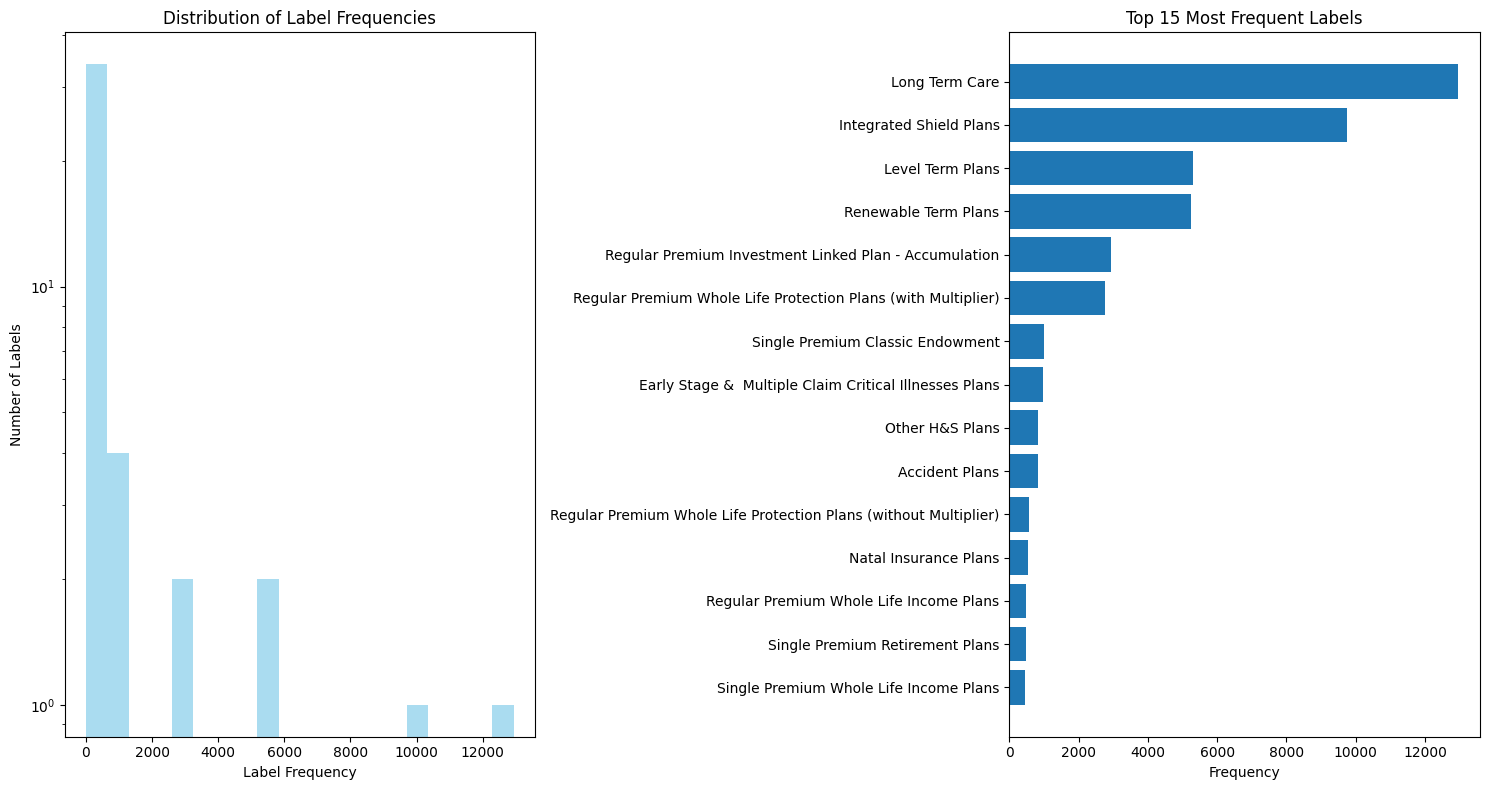

In [27]:
# === STEP 3: ANALYZE LABEL DISTRIBUTION AND CLASS IMBALANCE ===
print("\n=== STEP 3: LABEL DISTRIBUTION ANALYSIS ===")

# Analyze label frequency and imbalance
label_counts = y_binary.sum(axis=0)
label_names = mlb.classes_

# Create label analysis dataframe
label_df = pd.DataFrame({
    'Label': label_names,
    'Count': label_counts,
    'Percentage': (label_counts / len(y_binary)) * 100
}).sort_values('Count', ascending=False)

print("Top 10 most frequent labels:")
print(label_df.head(10))

print("\nBottom 10 least frequent labels:")
print(label_df.tail(10))

# Calculate imbalance ratio
max_count = label_counts.max()
min_count = label_counts.min()
imbalance_ratio = max_count / min_count
print(f"\nImbalance ratio: {imbalance_ratio:.2f}:1")
print(f"Average labels per sample: {y_binary.sum(axis=1).mean():.2f}")

# Visualize label distribution
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.hist(label_counts, bins=20, alpha=0.7, color='skyblue')
plt.xlabel('Label Frequency')
plt.ylabel('Number of Labels')
plt.title('Distribution of Label Frequencies')
plt.yscale('log')

plt.subplot(1, 2, 2)
top_15_labels = label_df.head(15)
plt.barh(range(len(top_15_labels)), top_15_labels['Count'])
plt.yticks(range(len(top_15_labels)), top_15_labels['Label'])
plt.xlabel('Frequency')
plt.title('Top 15 Most Frequent Labels')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [28]:
# === STEP 4: HANDLE CLASS IMBALANCE ===
print("\n=== STEP 4: CLASS IMBALANCE HANDLING ===")

def apply_cost_sensitive_weights(y_binary, cost_ratio=3.0):
    """
    Calculate class weights for cost-sensitive learning
    """
    weights = {}
    n_samples = len(y_binary)
    
    for i in range(y_binary.shape[1]):
        pos_count = y_binary[:, i].sum()
        neg_count = n_samples - pos_count
        
        if pos_count > 0:
            # Higher weight for minority class (positive cases)
            pos_weight = neg_count / pos_count * cost_ratio
            weights[i] = {0: 1.0, 1: pos_weight}
        else:
            weights[i] = {0: 1.0, 1: 1.0}
    
    return weights

# Calculate cost-sensitive weights
class_weights = apply_cost_sensitive_weights(y_binary)

# Alternative: Apply threshold-based balancing for extremely rare labels
def filter_rare_labels(y_binary, label_names, min_samples=10):
    """
    Filter out extremely rare labels that have fewer than min_samples
    """
    label_counts = y_binary.sum(axis=0)
    valid_indices = label_counts >= min_samples
    
    y_filtered = y_binary[:, valid_indices]
    labels_filtered = label_names[valid_indices]
    
    print(f"Filtered labels: {valid_indices.sum()}/{len(label_names)} labels retained")
    print(f"Removed {(~valid_indices).sum()} labels with <{min_samples} samples")
    
    return y_filtered, labels_filtered, valid_indices

# Apply label filtering
y_filtered, labels_filtered, valid_label_mask = filter_rare_labels(y_binary, mlb.classes_, min_samples=5)

print(f"Final label matrix shape: {y_filtered.shape}")


=== STEP 4: CLASS IMBALANCE HANDLING ===
Filtered labels: 38/44 labels retained
Removed 6 labels with <5 samples
Final label matrix shape: (61059, 38)


In [29]:
from sklearn.model_selection import train_test_split

# === STEP 5: TRAIN-TEST SPLIT ===
print("\n=== STEP 5: DATA SPLITTING ===")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_filtered, 
    test_size=0.2, 
    random_state=42,
    stratify=None  # Can't stratify multi-label easily
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Features: {X_train.shape[1]}")
print(f"Labels: {y_train.shape[1]}")


=== STEP 5: DATA SPLITTING ===
Training set: 48847 samples
Test set: 12212 samples
Features: 85
Labels: 38


In [59]:
from sklearn.preprocessing import StandardScaler

# === STEP 6: FEATURE SCALING ===
print("\n=== STEP 6: FEATURE SCALING ===")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed")


=== STEP 6: FEATURE SCALING ===
Feature scaling completed


In [60]:
# === STEP 6.5: HYBRID BALANCED RESAMPLING FOR CROSS-SELLING ===
print("\n=== STEP 6.5: HYBRID BALANCED RESAMPLING FOR CROSS-SELLING ===")

def apply_hybrid_balanced_resampling(X, y_binary, strategy='conservative'):
    """
    Apply hybrid balanced resampling (undersampling + oversampling) for cross-selling optimization
    """
    from imblearn.over_sampling import SMOTE
    from imblearn.under_sampling import RandomUnderSampler
    
    print(f"🔄 Applying hybrid balanced resampling with {strategy} strategy...")
    
    # Define strategy parameters
    strategies = {
        'conservative': {'max_ratio': 5, 'oversample_factor': 2},
        'moderate': {'max_ratio': 3, 'oversample_factor': 2}, 
        'aggressive': {'max_ratio': 2, 'oversample_factor': 3}
    }
    
    config = strategies.get(strategy, strategies['conservative'])
    max_ratio = config['max_ratio']
    oversample_factor = config['oversample_factor']
    
    print(f"Configuration: max_ratio={max_ratio}, oversample_factor={oversample_factor}")
    
    # Store original statistics
    original_counts = y_binary.sum(axis=0)
    n_samples = len(y_binary)
    
    print(f"\nOriginal dataset: {n_samples:,} samples")
    print(f"Class distribution before resampling:")
    for i, count in enumerate(original_counts[:10]):  # Show first 10 classes
        neg_count = n_samples - count
        ratio = neg_count / count if count > 0 else float('inf')
        print(f"  Label {i}: {count} pos, {neg_count} neg (ratio {ratio:.1f}:1)")
    
    # Collect all resampled data
    all_X = []
    all_y = []
    synthetic_count = 0
    
    # Start with original data
    all_X.append(X)
    all_y.append(y_binary)
    
    # Process each label that needs balancing
    labels_processed = 0
    
    for label_idx in range(y_binary.shape[1]):
        y_single = y_binary[:, label_idx]
        pos_count = y_single.sum()
        neg_count = n_samples - pos_count
        
        # Skip if too few positive samples
        if pos_count < 5:
            continue
            
        # Skip if already balanced enough
        current_ratio = neg_count / pos_count
        if current_ratio <= max_ratio:
            continue
            
        try:
            # Step 1: Undersample majority class (negatives)
            target_neg_count = pos_count * max_ratio
            
            if neg_count > target_neg_count:
                undersampler = RandomUnderSampler(
                    sampling_strategy={0: target_neg_count},
                    random_state=42
                )
                X_under, y_under = undersampler.fit_resample(X, y_single)
            else:
                X_under, y_under = X, y_single
            
            # Step 2: Oversample minority class (positives) 
            current_pos = y_under.sum()
            target_pos_count = min(current_pos * oversample_factor, target_neg_count)
            
            if target_pos_count > current_pos and current_pos >= 3:
                oversampler = SMOTE(
                    sampling_strategy={1: target_pos_count},
                    random_state=42,
                    k_neighbors=min(3, current_pos-1)
                )
                X_balanced, y_balanced = oversampler.fit_resample(X_under, y_under)
                
                # Extract only the synthetic samples
                original_len = len(X_under)
                if len(X_balanced) > original_len:
                    synthetic_X = X_balanced[original_len:]
                    
                    # Create corresponding y matrix for synthetic samples
                    synthetic_y = np.zeros((len(synthetic_X), y_binary.shape[1]))
                    synthetic_y[:, label_idx] = y_balanced[original_len:]
                    
                    all_X.append(synthetic_X)
                    all_y.append(synthetic_y)
                    synthetic_count += len(synthetic_X)
            
            labels_processed += 1
            
        except Exception as e:
            print(f"  Warning: Failed to process label {label_idx}: {e}")
            continue
    
    # Combine all data
    X_resampled = np.vstack(all_X)
    y_resampled = np.vstack(all_y)
    
    # Report results
    new_counts = y_resampled.sum(axis=0)
    new_n_samples = len(y_resampled)
    
    print(f"\n✅ Resampling completed:")
    print(f"  • Labels processed: {labels_processed}")
    print(f"  • Synthetic samples added: {synthetic_count:,}")
    print(f"  • Final dataset size: {new_n_samples:,} samples ({new_n_samples/n_samples:.1f}x)")
    
    print(f"\nClass distribution after resampling (first 10 labels):")
    for i, (orig, new) in enumerate(zip(original_counts[:10], new_counts[:10])):
        new_neg = new_n_samples - new
        new_ratio = new_neg / new if new > 0 else float('inf')
        improvement = orig / new if new > 0 else 0
        print(f"  Label {i}: {orig} → {new} pos ({improvement:.1f}x), ratio {new_ratio:.1f}:1")
    
    return X_resampled, y_resampled

# Apply hybrid balanced resampling
print("Applying hybrid_balanced_conservative resampling for cross-selling optimization...")
X_train_balanced, y_train_balanced = apply_hybrid_balanced_resampling(
    X_train_scaled, y_train, strategy='conservative'
)

print(f"\nTraining data after resampling:")
print(f"  • Original: {X_train_scaled.shape[0]:,} samples")
print(f"  • Balanced: {X_train_balanced.shape[0]:,} samples")
print(f"  • Increase: {(X_train_balanced.shape[0] / X_train_scaled.shape[0]):.1f}x")


=== STEP 6.5: HYBRID BALANCED RESAMPLING FOR CROSS-SELLING ===
Applying hybrid_balanced_conservative resampling for cross-selling optimization...
🔄 Applying hybrid balanced resampling with conservative strategy...
Configuration: max_ratio=5, oversample_factor=2

Original dataset: 48,847 samples
Class distribution before resampling:
  Label 0: 639 pos, 48208 neg (ratio 75.4:1)
  Label 1: 55 pos, 48792 neg (ratio 887.1:1)
  Label 2: 794 pos, 48053 neg (ratio 60.5:1)
  Label 3: 138 pos, 48709 neg (ratio 353.0:1)
  Label 4: 101 pos, 48746 neg (ratio 482.6:1)
  Label 5: 7825 pos, 41022 neg (ratio 5.2:1)
  Label 6: 38 pos, 48809 neg (ratio 1284.4:1)
  Label 7: 4231 pos, 44616 neg (ratio 10.5:1)
  Label 8: 29 pos, 48818 neg (ratio 1683.4:1)
  Label 9: 209 pos, 48638 neg (ratio 232.7:1)

✅ Resampling completed:
  • Labels processed: 37
  • Synthetic samples added: 28,005
  • Final dataset size: 76,852 samples (1.6x)

Class distribution after resampling (first 10 labels):
  Label 0: 639 → 1278

In [61]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputClassifier

# === STEP 7: MODEL TRAINING - XGBOOST MULTI-OUTPUT ===
print("\n=== STEP 7: MODEL TRAINING ===")

# Define XGBoost base classifier with optimized parameters for insurance data
base_xgb = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1,
    tree_method='hist'  # Faster for large datasets
)

# Create multi-output classifier
print("Training XGBoost MultiOutput model...")
xgb_multi = MultiOutputClassifier(base_xgb, n_jobs=-1)
xgb_multi.fit(X_train_balanced, y_train_balanced)

print("XGBoost training completed")


=== STEP 7: MODEL TRAINING ===
Training XGBoost MultiOutput model...
XGBoost training completed


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  hamming_loss, jaccard_score

# === STEP 8: ALTERNATIVE MODEL - RANDOM FOREST ===
print("\n=== STEP 8: TRAINING RANDOM FOREST BASELINE ===")

base_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_multi = MultiOutputClassifier(base_rf, n_jobs=-1)
rf_multi.fit(X_train_balanced, y_train_balanced )

print("Random Forest training completed")



=== STEP 8: TRAINING RANDOM FOREST BASELINE ===
Random Forest training completed


In [52]:
# === STEP 9: TOP-K RECOMMENDATION EVALUATION ===
print("\n=== STEP 9: TOP-K RECOMMENDATION EVALUATION ===")

def evaluate_top_k_recommendations(model, X_test, y_test, model_name, label_names, k=3):
    """
    Comprehensive evaluation for top-k recommendation system
    """
    print(f"\n--- {model_name} Top-{k} Recommendation Evaluation ---")
    
    # Get prediction probabilities
    try:
        y_pred_proba = model.predict_proba(X_test)
        # For multi-output, this returns a list of arrays
        if isinstance(y_pred_proba, list):
            y_pred_proba = np.column_stack([prob[:, 1] for prob in y_pred_proba])
    except:
        print("Error: Prediction probabilities not available")
        return None
    
    # Get top-k predictions for each sample
    top_k_indices = np.argsort(y_pred_proba, axis=1)[:, -k:][:, ::-1]  # Descending order
    
    # Initialize metrics
    hit_rates = []
    precision_at_k_list = []
    recall_at_k_list = []
    ndcg_list = []
    position_weighted_hits = []
    
    # Position weights (position 1 is most important)
    position_weights = np.array([1.0, 0.8, 0.6])  # Weights for positions 1, 2, 3
    
    customers_with_labels = 0
    total_customers = len(y_test)
    
    # Detailed analysis
    position_analysis = {1: 0, 2: 0, 3: 0}  # Count hits by position
    multiple_hits_count = 0
    perfect_matches = 0
    
    for i in range(total_customers):
        true_labels = np.where(y_test[i] == 1)[0]
        pred_labels = top_k_indices[i]
        
        if len(true_labels) == 0:
            continue  # Skip customers with no relevant products
            
        customers_with_labels += 1
        
        # Find intersection
        hits = np.intersect1d(true_labels, pred_labels)
        hit_positions = []
        
        for hit_label in hits:
            position = np.where(pred_labels == hit_label)[0][0] + 1  # 1-indexed position
            hit_positions.append(position)
            position_analysis[position] += 1
        
        # Hit Rate: did we get at least one correct recommendation?
        hit_rate = 1 if len(hits) > 0 else 0
        hit_rates.append(hit_rate)
        
        # Precision@k: how many of our k predictions were correct?
        precision_at_k = len(hits) / k
        precision_at_k_list.append(precision_at_k)
        
        # Recall@k: how many of the true labels did we capture?
        recall_at_k = len(hits) / len(true_labels)
        recall_at_k_list.append(recall_at_k)
        
        # Position-weighted scoring (higher weight for better positions)
        position_weighted_score = 0
        for pos in hit_positions:
            position_weighted_score += position_weights[pos - 1]
        position_weighted_hits.append(position_weighted_score)
        
        # Count multiple hits and perfect matches
        if len(hits) > 1:
            multiple_hits_count += 1
        if len(hits) == len(true_labels) and len(hits) == k:
            perfect_matches += 1
        
        # NDCG calculation (simplified)
        dcg = 0
        for j, pred_label in enumerate(pred_labels):
            if pred_label in true_labels:
                dcg += 1 / np.log2(j + 2)  # j+2 because log2(1) = 0
        
        # Ideal DCG (if all true labels were in top positions)
        idcg = sum(1 / np.log2(j + 2) for j in range(min(len(true_labels), k)))
        ndcg = dcg / idcg if idcg > 0 else 0
        ndcg_list.append(ndcg)
    
    # Calculate final metrics
    final_metrics = {
        'hit_rate@k': np.mean(hit_rates),
        'precision@k': np.mean(precision_at_k_list),
        'recall@k': np.mean(recall_at_k_list),
        'ndcg@k': np.mean(ndcg_list),
        'position_weighted_score': np.mean(position_weighted_hits),
        'customers_with_labels': customers_with_labels,
        'total_customers': total_customers
    }
    
    # Print results
    print(f"📊 RECOMMENDATION METRICS (Top-{k}):")
    print(f"  • Hit Rate@{k}: {final_metrics['hit_rate@k']:.4f} ({final_metrics['hit_rate@k']*100:.1f}%)")
    print(f"  • Precision@{k}: {final_metrics['precision@k']:.4f}")
    print(f"  • Recall@{k}: {final_metrics['recall@k']:.4f}")
    print(f"  • NDCG@{k}: {final_metrics['ndcg@k']:.4f}")
    print(f"  • Position Weighted Score: {final_metrics['position_weighted_score']:.4f}")
    
    print(f"\n📍 POSITION ANALYSIS:")
    for pos in [1, 2, 3]:
        percentage = (position_analysis[pos] / customers_with_labels) * 100 if customers_with_labels > 0 else 0
        print(f"  • Hits at Position {pos}: {position_analysis[pos]} ({percentage:.1f}%)")
    
    print(f"\n🎯 DETAILED INSIGHTS:")
    print(f"  • Customers with relevant products: {customers_with_labels:,} / {total_customers:,}")
    print(f"  • Multiple hits per customer: {multiple_hits_count} ({multiple_hits_count/customers_with_labels*100:.1f}%)")
    print(f"  • Perfect recommendations: {perfect_matches} ({perfect_matches/customers_with_labels*100:.1f}%)")
    
    # Per-label analysis for top labels
    label_hit_analysis = {}
    for i, label in enumerate(label_names):
        label_hits = 0
        label_total = (y_test[:, i] == 1).sum()
        
        if label_total > 0:
            for j in range(total_customers):
                if y_test[j, i] == 1 and i in top_k_indices[j]:
                    label_hits += 1
            
            label_hit_analysis[label] = {
                'hit_rate': label_hits / label_total,
                'total_relevant': label_total,
                'hits': label_hits
            }
    
    # Show top performing labels
    sorted_labels = sorted(label_hit_analysis.items(), 
                          key=lambda x: x[1]['hit_rate'], reverse=True)
    
    print(f"\n🏆 TOP 10 LABELS BY HIT RATE@{k}:")
    for label, metrics in sorted_labels[:10]:
        print(f"  • {label}: {metrics['hit_rate']:.3f} ({metrics['hits']}/{metrics['total_relevant']})")
    
    return final_metrics

# Evaluate both models with top-k metrics
xgb_results = evaluate_top_k_recommendations(xgb_multi, X_test_scaled, y_test, "XGBoost", labels_filtered, k=3)
rf_results = evaluate_top_k_recommendations(rf_multi, X_test_scaled, y_test, "Random Forest", labels_filtered, k=3)



=== STEP 9: TOP-K RECOMMENDATION EVALUATION ===

--- XGBoost Top-3 Recommendation Evaluation ---
📊 RECOMMENDATION METRICS (Top-3):
  • Hit Rate@3: 0.8059 (80.6%)
  • Precision@3: 0.3067
  • Recall@3: 0.7912
  • NDCG@3: 0.7085
  • Position Weighted Score: 0.8327

📍 POSITION ANALYSIS:
  • Hits at Position 1: 4698 (58.4%)
  • Hits at Position 2: 1898 (23.6%)
  • Hits at Position 3: 810 (10.1%)

🎯 DETAILED INSIGHTS:
  • Customers with relevant products: 8,049 / 12,212
  • Multiple hits per customer: 909 (11.3%)
  • Perfect recommendations: 1 (0.0%)

🏆 TOP 10 LABELS BY HIT RATE@3:
  • Long Term Care: 0.925 (2416/2613)
  • Integrated Shield Plans: 0.898 (1738/1935)
  • Level Term Plans: 0.877 (948/1081)
  • Renewable Term Plans: 0.868 (933/1075)
  • Regular Premium Investment Linked Plan - Accumulation: 0.866 (519/599)
  • Single Premium Classic Endowment: 0.690 (138/200)
  • Index Linked Universal Life: 0.632 (12/19)
  • Regular Premium Whole Life Protection Plans (with Multiplier): 0.585 

In [53]:
# === STEP 10: MODEL COMPARISON FOR TOP-K RECOMMENDATIONS ===
print("\n=== STEP 10: TOP-K MODEL COMPARISON ===")

comparison_df = pd.DataFrame({
    'XGBoost': [
        xgb_results['hit_rate@k'],
        xgb_results['precision@k'],
        xgb_results['recall@k'],
        xgb_results['ndcg@k'],
        xgb_results['position_weighted_score']
    ],
    'Random Forest': [
        rf_results['hit_rate@k'],
        rf_results['precision@k'],
        rf_results['recall@k'],
        rf_results['ndcg@k'],
        rf_results['position_weighted_score']
    ]
}, index=['Hit Rate@3', 'Precision@3', 'Recall@3', 'NDCG@3', 'Position Weighted Score'])

print("📊 Model Comparison for Top-3 Recommendations:")
print(comparison_df)

# Determine best model
xgb_score = (xgb_results['hit_rate@k'] * 0.4 + 
             xgb_results['precision@k'] * 0.3 + 
             xgb_results['position_weighted_score'] * 0.3)
rf_score = (rf_results['hit_rate@k'] * 0.4 + 
            rf_results['precision@k'] * 0.3 + 
            rf_results['position_weighted_score'] * 0.3)

best_model = "XGBoost" if xgb_score > rf_score else "Random Forest"
best_results = xgb_results if xgb_score > rf_score else rf_results

print(f"\n🏆 Best Model: {best_model}")
print(f"   Composite Score: {max(xgb_score, rf_score):.4f}")
print(f"   Hit Rate@3: {best_results['hit_rate@k']*100:.1f}%")
print(f"   Precision@3: {best_results['precision@k']:.3f}")
print(f"   Position Weighted Score: {best_results['position_weighted_score']:.3f}")



=== STEP 10: TOP-K MODEL COMPARISON ===
📊 Model Comparison for Top-3 Recommendations:
                          XGBoost  Random Forest
Hit Rate@3               0.805939       0.755622
Precision@3              0.306705       0.286081
Recall@3                 0.791204       0.740612
NDCG@3                   0.708485       0.666067
Position Weighted Score  0.832700       0.778606

🏆 Best Model: XGBoost
   Composite Score: 0.6642
   Hit Rate@3: 80.6%
   Precision@3: 0.307
   Position Weighted Score: 0.833


In [54]:
# === STEP 11: BUSINESS IMPACT ANALYSIS FOR TOP-K ===
print("\n=== STEP 11: BUSINESS IMPACT ANALYSIS FOR TOP-K ===")

def business_impact_top_k(model, X_test, y_test, label_names, model_name, k=3):
    """
    Analyze business impact of top-k recommendations
    """
    # Get top-k predictions
    try:
        y_pred_proba = model.predict_proba(X_test)
        if isinstance(y_pred_proba, list):
            y_pred_proba = np.column_stack([prob[:, 1] for prob in y_pred_proba])
    except:
        print("Error: Cannot get prediction probabilities")
        return None
    
    top_k_indices = np.argsort(y_pred_proba, axis=1)[:, -k:]
    
    # Create binary prediction matrix for top-k
    y_pred_topk = np.zeros_like(y_test)
    for i in range(len(y_test)):
        y_pred_topk[i, top_k_indices[i]] = 1
    
    # Revenue weights (enhanced mapping)
    revenue_weights = {
        'Long Term Care': 1200,
        'Integrated Shield': 800,
        'Level Term': 600,
        'Renewable Term': 600,
        'Investment Linked': 1500,
        'Whole Life': 1000,
        'Endowment': 1300,
        'Critical Illness': 900,
        'Disability Income': 700,
        'Accident': 400,
        'Universal Life': 1400,
        'Retirement': 1100
    }
    
    # Map labels to revenue
    label_revenues = []
    for label in label_names:
        revenue = 500  # Default revenue
        for key, value in revenue_weights.items():
            if any(term in label for term in key.split()):
                revenue = value
                break
        label_revenues.append(revenue)
    
    label_revenues = np.array(label_revenues)
    
    # Calculate revenue metrics
    true_positives = (y_test == 1) & (y_pred_topk == 1)
    predicted_positives = (y_pred_topk == 1)
    
    revenue_weighted_tp = np.sum(true_positives * label_revenues)
    revenue_weighted_pred = np.sum(predicted_positives * label_revenues)
    revenue_weighted_true = np.sum((y_test == 1) * label_revenues)
    
    revenue_precision = revenue_weighted_tp / revenue_weighted_pred if revenue_weighted_pred > 0 else 0
    revenue_recall = revenue_weighted_tp / revenue_weighted_true if revenue_weighted_true > 0 else 0
    
    # Customer experience metrics
    recommendations_per_customer = y_pred_topk.sum(axis=1).mean()
    customers_with_hits = np.sum([np.any((y_test[i] == 1) & (y_pred_topk[i] == 1)) for i in range(len(y_test))])
    customer_satisfaction_rate = customers_with_hits / len(y_test)
    
    # Revenue opportunity analysis
    total_revenue_potential = revenue_weighted_true
    captured_revenue = revenue_weighted_tp
    missed_revenue = revenue_weighted_true - revenue_weighted_tp
    revenue_capture_rate = captured_revenue / total_revenue_potential if total_revenue_potential > 0 else 0
    
    # Cross-selling success
    customers_with_multiple_products = np.sum(y_test.sum(axis=1) > 1)
    successful_cross_sell = 0
    for i in range(len(y_test)):
        if y_test[i].sum() > 1:  # Customer has multiple products
            if np.sum((y_test[i] == 1) & (y_pred_topk[i] == 1)) > 1:  # We recommended multiple correctly
                successful_cross_sell += 1
    
    cross_sell_success_rate = successful_cross_sell / customers_with_multiple_products if customers_with_multiple_products > 0 else 0
    
    print(f"\n--- {model_name} Business Impact (Top-{k}) ---")
    print(f"💰 REVENUE METRICS:")
    print(f"  • Revenue-weighted Precision: {revenue_precision:.4f}")
    print(f"  • Revenue-weighted Recall: {revenue_recall:.4f}")
    print(f"  • Revenue Capture Rate: {revenue_capture_rate:.4f} ({revenue_capture_rate*100:.1f}%)")
    print(f"  • Total Revenue Potential: ${total_revenue_potential:,.0f}")
    print(f"  • Captured Revenue: ${captured_revenue:,.0f}")
    print(f"  • Missed Revenue: ${missed_revenue:,.0f}")
    
    print(f"\n👥 CUSTOMER EXPERIENCE:")
    print(f"  • Average Recommendations per Customer: {recommendations_per_customer:.1f}")
    print(f"  • Customer Satisfaction Rate: {customer_satisfaction_rate:.4f} ({customer_satisfaction_rate*100:.1f}%)")
    print(f"  • Cross-sell Success Rate: {cross_sell_success_rate:.4f} ({cross_sell_success_rate*100:.1f}%)")
    
    # ROI Estimation
    # Assume cost of $10 per recommendation, conversion rate varies by position
    position_conversion_rates = [0.15, 0.10, 0.05]  # Position 1, 2, 3
    recommendation_cost = 10
    
    total_recommendations = len(y_test) * k
    total_cost = total_recommendations * recommendation_cost
    
    # Estimate revenue based on position-weighted conversions
    estimated_revenue = 0
    for i in range(len(y_test)):
        top_k_for_customer = top_k_indices[i]
        for pos, label_idx in enumerate(top_k_for_customer):
            estimated_revenue += label_revenues[label_idx] * position_conversion_rates[pos]
    
    roi = (estimated_revenue - total_cost) / total_cost if total_cost > 0 else 0
    
    print(f"\n📈 ROI ANALYSIS:")
    print(f"  • Total Recommendation Cost: ${total_cost:,.0f}")
    print(f"  • Estimated Revenue: ${estimated_revenue:,.0f}")
    print(f"  • ROI: {roi:.2f} ({roi*100:.1f}%)")
    
    return {
        'revenue_precision': revenue_precision,
        'revenue_recall': revenue_recall,
        'revenue_capture_rate': revenue_capture_rate,
        'customer_satisfaction_rate': customer_satisfaction_rate,
        'cross_sell_success_rate': cross_sell_success_rate,
        'roi': roi,
        'total_potential': total_revenue_potential,
        'captured_revenue': captured_revenue
    }

# Analyze business impact for both models
xgb_business = business_impact_top_k(xgb_multi, X_test_scaled, y_test, labels_filtered, "XGBoost", k=3)
rf_business = business_impact_top_k(rf_multi, X_test_scaled, y_test, labels_filtered, "Random Forest", k=3)



=== STEP 11: BUSINESS IMPACT ANALYSIS FOR TOP-K ===

--- XGBoost Business Impact (Top-3) ---
💰 REVENUE METRICS:
  • Revenue-weighted Precision: 0.2152
  • Revenue-weighted Recall: 0.7833
  • Revenue Capture Rate: 0.7833 (78.3%)
  • Total Revenue Potential: $10,390,500
  • Captured Revenue: $8,139,100
  • Missed Revenue: $2,251,400

👥 CUSTOMER EXPERIENCE:
  • Average Recommendations per Customer: 3.0
  • Customer Satisfaction Rate: 0.5312 (53.1%)
  • Cross-sell Success Rate: 0.6621 (66.2%)

📈 ROI ANALYSIS:
  • Total Recommendation Cost: $366,360
  • Estimated Revenue: $3,664,855
  • ROI: 9.00 (900.3%)

--- Random Forest Business Impact (Top-3) ---
💰 REVENUE METRICS:
  • Revenue-weighted Precision: 0.2041
  • Revenue-weighted Recall: 0.7323
  • Revenue Capture Rate: 0.7323 (73.2%)
  • Total Revenue Potential: $10,390,500
  • Captured Revenue: $7,608,900
  • Missed Revenue: $2,781,600

👥 CUSTOMER EXPERIENCE:
  • Average Recommendations per Customer: 3.0
  • Customer Satisfaction Rate: 0.

In [55]:
# === STEP 12: TOP-K RECOMMENDATION FUNCTION ===
print("\n=== STEP 12: CREATING TOP-K RECOMMENDATION FUNCTION ===")

def recommend_top_k_products(client_features, model, scaler, label_names, k=3):
    """
    Generate top-k product recommendations for a client
    """
    # Scale features
    client_scaled = scaler.transform(client_features.reshape(1, -1))
    
    # Get predictions
    try:
        probabilities = model.predict_proba(client_scaled)
        if isinstance(probabilities, list):
            probs = np.array([prob[0, 1] for prob in probabilities])
        else:
            probs = probabilities[0]
    except:
        # Fallback to binary predictions with random tie-breaking
        binary_pred = model.predict(client_scaled)[0]
        probs = binary_pred.astype(float) + np.random.uniform(0, 0.001, len(binary_pred))
    
    # Get top-k indices
    top_k_indices = np.argsort(probs)[-k:][::-1]  # Descending order
    
    # Create recommendations dataframe
    recommendations = pd.DataFrame({
        'Rank': range(1, k+1),
        'Product': label_names[top_k_indices],
        'Probability': probs[top_k_indices],
        'Confidence': ['High' if p > 0.3 else 'Medium' if p > 0.1 else 'Low' 
                      for p in probs[top_k_indices]]
    })
    
    return recommendations

def evaluate_sample_recommendation(client_index, model, X_test, y_test, scaler, label_names, k=3):
    """
    Evaluate a specific recommendation and show actual vs predicted
    """
    sample_client = X_test[client_index]
    sample_true = y_test[client_index]
    
    # Get recommendation
    recommendations = recommend_top_k_products(sample_client, model, scaler, label_names, k)
    
    # Get actual relevant products
    actual_products = label_names[sample_true == 1]
    
    # Check which recommendations are correct
    recommended_products = recommendations['Product'].values
    correct_recommendations = np.intersect1d(actual_products, recommended_products)
    
    print(f"\n🎯 SAMPLE RECOMMENDATION ANALYSIS (Customer {client_index}):")
    print(f"\n📋 TOP-{k} RECOMMENDATIONS:")
    for _, row in recommendations.iterrows():
        hit_marker = "✅" if row['Product'] in actual_products else "❌"
        print(f"  {row['Rank']}. {hit_marker} {row['Product']}")
        print(f"     Probability: {row['Probability']:.4f} | Confidence: {row['Confidence']}")
    
    print(f"\n📊 ACTUAL RELEVANT PRODUCTS:")
    if len(actual_products) > 0:
        for i, product in enumerate(actual_products, 1):
            print(f"  {i}. {product}")
    else:
        print("  No relevant products for this customer")
    
    print(f"\n🎯 RECOMMENDATION PERFORMANCE:")
    hit_rate = len(correct_recommendations) / k if k > 0 else 0
    recall = len(correct_recommendations) / len(actual_products) if len(actual_products) > 0 else 0
    
    print(f"  • Hits: {len(correct_recommendations)}/{k} recommendations correct")
    print(f"  • Hit Rate: {hit_rate:.3f}")
    print(f"  • Recall: {recall:.3f}")

# Example recommendations for multiple test clients
print("\n=== SAMPLE RECOMMENDATION EXAMPLES ===")

# Choose the best model for recommendations
best_model = xgb_multi if best_model == "XGBoost" else rf_multi

# Analyze several sample clients
sample_indices = [0, 100, 500, 2000]  # Different customers to analyze

for idx in sample_indices:
    if idx < len(X_test_scaled):
        evaluate_sample_recommendation(
            idx, best_model, X_test_scaled, y_test, scaler, labels_filtered, k=3
        )

print("\n=== RECOMMENDATION SYSTEM SUMMARY ===")

# Calculate final success metrics
print(f"\n📈 FINAL SYSTEM PERFORMANCE:")
print(f"✅ Best Model: {best_model}")
print(f"✅ Hit Rate@3: {best_results['hit_rate@k']*100:.1f}% (customers getting at least 1 relevant recommendation)")
print(f"✅ Precision@3: {best_results['precision@k']:.3f} (average relevant recommendations per customer)")
print(f"✅ Position Weighted Score: {best_results['position_weighted_score']:.3f} (considers ranking quality)")

if best_model == "XGBoost":
    business_metrics = xgb_business
else:
    business_metrics = rf_business

print(f"\n💼 BUSINESS IMPACT:")
print(f"✅ Revenue Capture Rate: {business_metrics['revenue_capture_rate']*100:.1f}%")
print(f"✅ Customer Satisfaction Rate: {business_metrics['customer_satisfaction_rate']*100:.1f}%")
print(f"✅ ROI: {business_metrics['roi']*100:.1f}%")
print(f"✅ Cross-sell Success Rate: {business_metrics['cross_sell_success_rate']*100:.1f}%")




=== STEP 12: CREATING TOP-K RECOMMENDATION FUNCTION ===

=== SAMPLE RECOMMENDATION EXAMPLES ===

🎯 SAMPLE RECOMMENDATION ANALYSIS (Customer 0):

📋 TOP-3 RECOMMENDATIONS:
  1. ❌ Integrated Shield Plans
     Probability: 0.1774 | Confidence: Medium
  2. ❌ Accident Plans
     Probability: 0.1086 | Confidence: Medium
  3. ✅ Long Term Care
     Probability: 0.0852 | Confidence: Low

📊 ACTUAL RELEVANT PRODUCTS:
  1. Long Term Care

🎯 RECOMMENDATION PERFORMANCE:
  • Hits: 1/3 recommendations correct
  • Hit Rate: 0.333
  • Recall: 1.000

🎯 SAMPLE RECOMMENDATION ANALYSIS (Customer 100):

📋 TOP-3 RECOMMENDATIONS:
  1. ❌ Integrated Shield Plans
     Probability: 0.3200 | Confidence: High
  2. ❌ Accident Plans
     Probability: 0.1125 | Confidence: Medium
  3. ✅ Long Term Care
     Probability: 0.0787 | Confidence: Low

📊 ACTUAL RELEVANT PRODUCTS:
  1. Long Term Care

🎯 RECOMMENDATION PERFORMANCE:
  • Hits: 1/3 recommendations correct
  • Hit Rate: 0.333
  • Recall: 1.000

🎯 SAMPLE RECOMMENDATIO

c:\Users\_vico\source\repos\synergysg\OCC\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\_vico\source\repos\synergysg\OCC\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\_vico\source\repos\synergysg\OCC\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\_vico\source\repos\synergysg\OCC\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [43]:
# Save the model and preprocessing components
import joblib

model_to_save = xgb_multi if best_model == "XGBoost" else rf_multi
joblib.dump(model_to_save, 'insurance_top_k_recommendation_model.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')
joblib.dump(labels_filtered, 'label_names.pkl')
joblib.dump(valid_label_mask, 'valid_label_mask.pkl')

# Save evaluation results
results_summary = {
    'model_type': best_model,
    'hit_rate_at_3': best_results['hit_rate@k'],
    'precision_at_3': best_results['precision@k'],
    'recall_at_3': best_results['recall@k'],
    'ndcg_at_3': best_results['ndcg@k'],
    'position_weighted_score': best_results['position_weighted_score'],
    'revenue_capture_rate': business_metrics['revenue_capture_rate'],
    'customer_satisfaction_rate': business_metrics['customer_satisfaction_rate'],
    'roi': business_metrics['roi']
}

joblib.dump(results_summary, 'model_performance_summary.pkl')

print("\n✅ Model, preprocessing components, and results saved successfully!")
print("\nFiles saved:")
print("  • insurance_top_k_recommendation_model.pkl")
print("  • feature_scaler.pkl")
print("  • label_names.pkl")
print("  • valid_label_mask.pkl")
print("  • model_performance_summary.pkl")


✅ Model, preprocessing components, and results saved successfully!

Files saved:
  • insurance_top_k_recommendation_model.pkl
  • feature_scaler.pkl
  • label_names.pkl
  • valid_label_mask.pkl
  • model_performance_summary.pkl


🔍 Analyzing whether high hit rate is due to class imbalance...
=== CLASS IMBALANCE IMPACT ANALYSIS ===

📊 PERFORMANCE BY CLASS SIZE:

🏷️  Large (1000+) Classes:
   Number of classes: 4
   Average hit rate: 0.892
   Hit rate range: 0.868 - 0.925
   Average position: 2.47
   Total samples: 6,704
   Individual classes:
     • Long Term Care                                     Support: 2613 | Hit Rate: 0.925
     • Integrated Shield Plans                            Support: 1935 | Hit Rate: 0.898
     • Level Term Plans                                   Support: 1081 | Hit Rate: 0.877
     • Renewable Term Plans                               Support: 1075 | Hit Rate: 0.868

🏷️  Medium (100-999) Classes:
   Number of classes: 8
   Average hit rate: 0.457
   Hit rate range: 0.118 - 0.866
   Average position: 2.04
   Total samples: 2,082
   Individual classes:
     • Regular Premium Investment Linked Plan - Accumulat Support:  599 | Hit Rate: 0.866
     • Regular Premium Whole Life Protection

C:\Users\_vico\AppData\Local\Temp\ipykernel_22200\3800473808.py:180: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax2.boxplot(hit_rates_by_category, labels=categories, patch_artist=True)


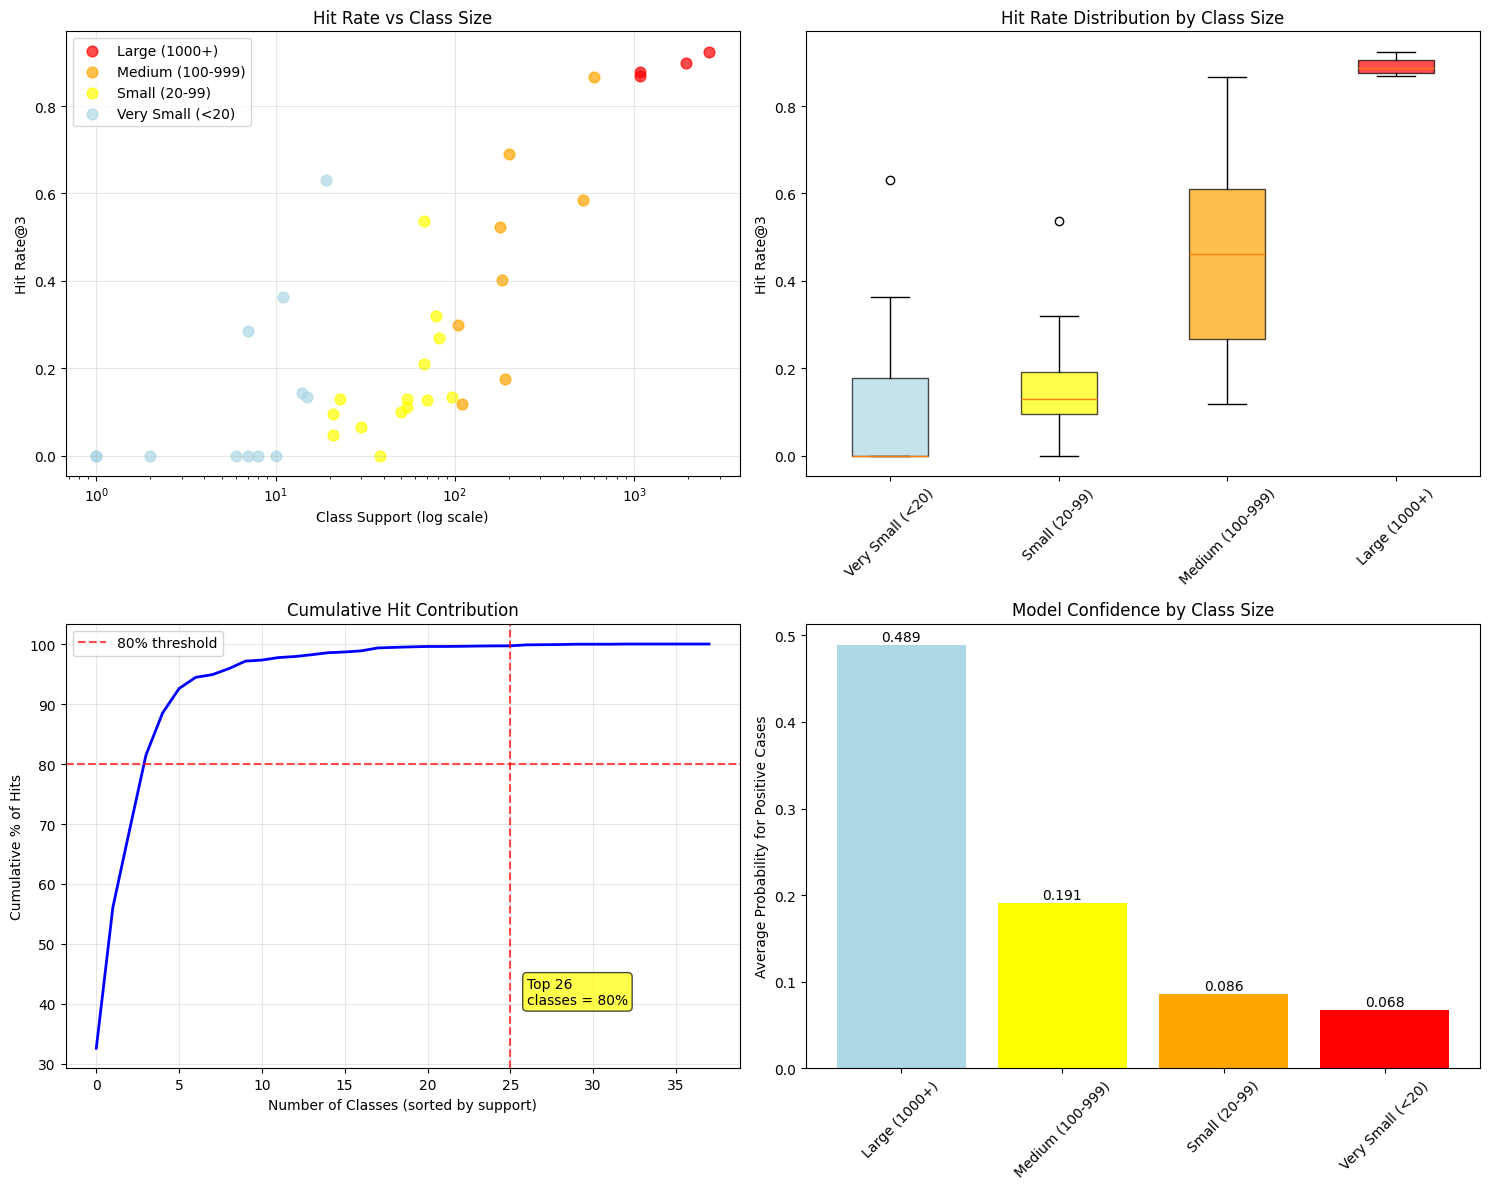

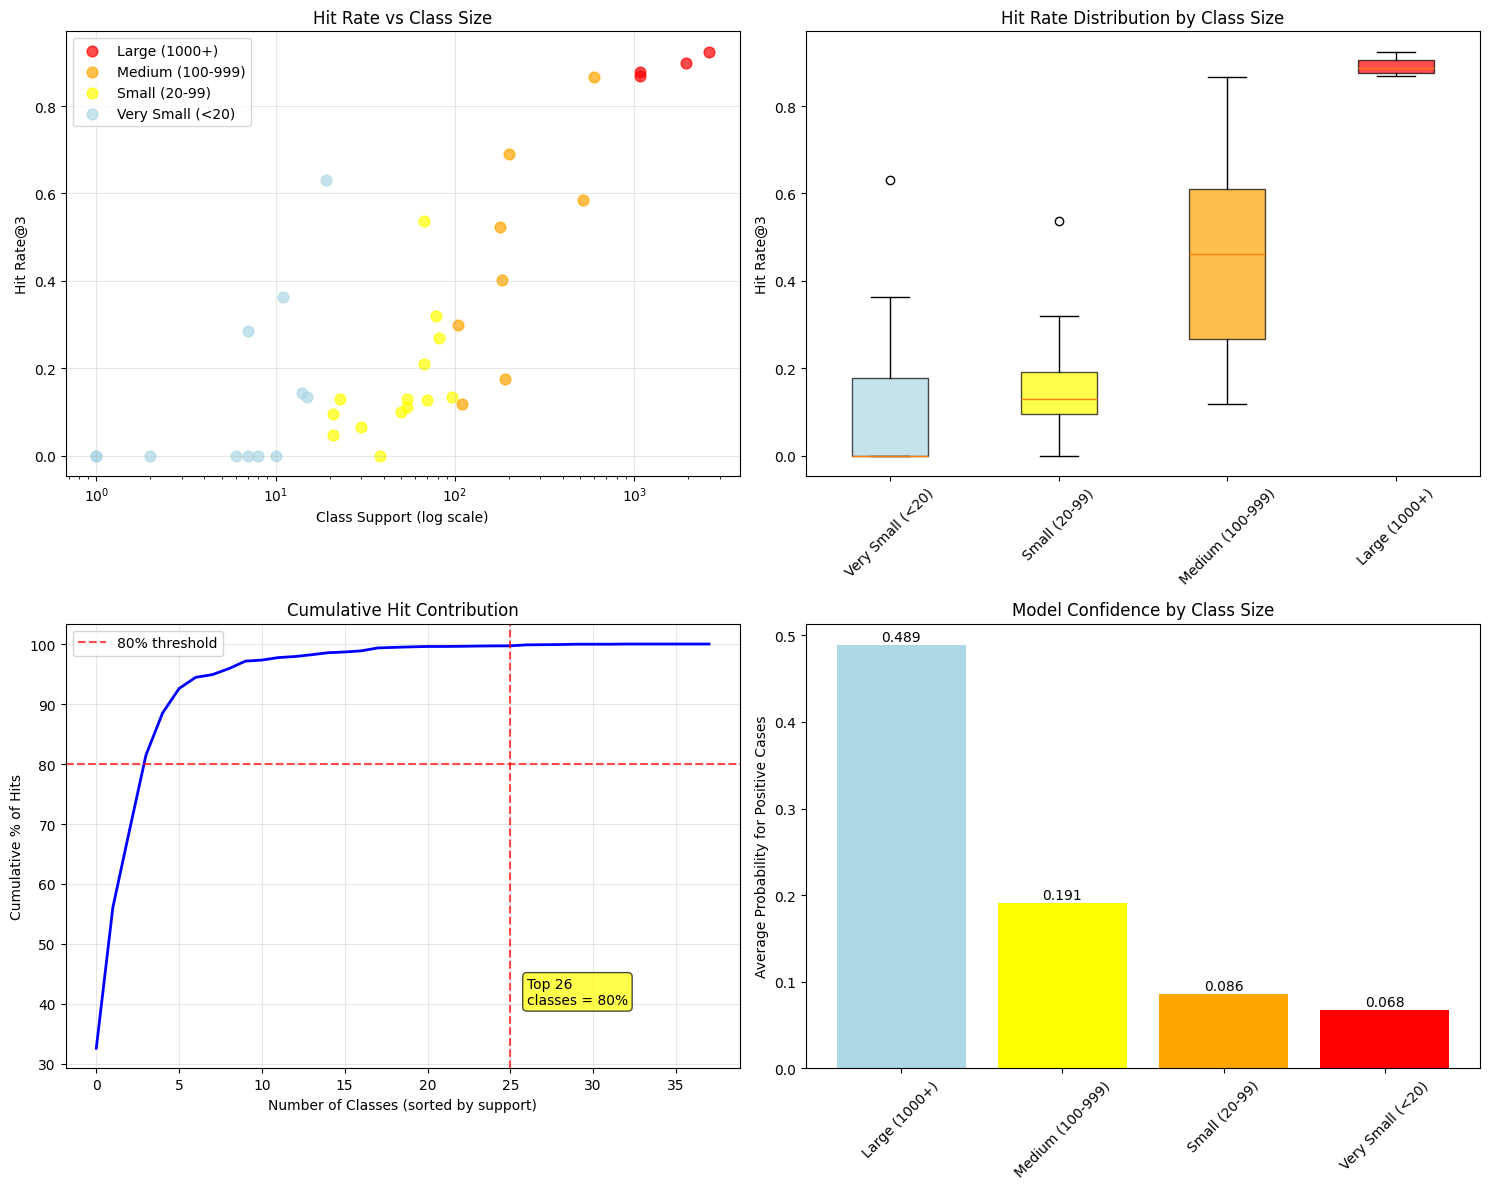

In [58]:
# === DETAILED CLASS IMBALANCE IMPACT ANALYSIS ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_performance_by_class_size(model, X_test, y_test, label_names, k=3):
    """
    Analyze how model performance varies by class frequency
    """
    print("=== CLASS IMBALANCE IMPACT ANALYSIS ===")
    
    # Get predictions
    try:
        y_pred_proba = model.predict_proba(X_test)
        if isinstance(y_pred_proba, list):
            y_pred_proba = np.column_stack([prob[:, 1] for prob in y_pred_proba])
    except:
        print("Error: Cannot get prediction probabilities")
        return None
    
    # Get top-k predictions for each sample
    top_k_indices = np.argsort(y_pred_proba, axis=1)[:, -k:]
    
    # Calculate support (number of positive samples) for each class
    class_supports = y_test.sum(axis=0)
    
    # Create detailed analysis dataframe
    analysis_data = []
    
    for i, label in enumerate(label_names):
        support = class_supports[i]
        
        if support == 0:
            continue
            
        # Calculate hit rate for this specific class
        hits = 0
        for j in range(len(y_test)):
            if y_test[j, i] == 1 and i in top_k_indices[j]:
                hits += 1
        
        hit_rate = hits / support if support > 0 else 0
        
        # Calculate average position when this class appears in top-k
        positions = []
        for j in range(len(y_test)):
            if y_test[j, i] == 1 and i in top_k_indices[j]:
                position = np.where(top_k_indices[j] == i)[0][0] + 1
                positions.append(position)
        
        avg_position = np.mean(positions) if positions else None
        
        # Calculate probability statistics for this class
        true_positive_mask = y_test[:, i] == 1
        if true_positive_mask.sum() > 0:
            avg_prob_for_positive = y_pred_proba[true_positive_mask, i].mean()
            max_prob_for_positive = y_pred_proba[true_positive_mask, i].max()
            min_prob_for_positive = y_pred_proba[true_positive_mask, i].min()
        else:
            avg_prob_for_positive = max_prob_for_positive = min_prob_for_positive = 0
        
        # Categorize by sample size
        if support >= 1000:
            size_category = "Large (1000+)"
        elif support >= 100:
            size_category = "Medium (100-999)"
        elif support >= 20:
            size_category = "Small (20-99)"
        else:
            size_category = "Very Small (<20)"
        
        analysis_data.append({
            'Label': label,
            'Support': support,
            'Size_Category': size_category,
            'Hit_Rate': hit_rate,
            'Hits': hits,
            'Avg_Position': avg_position,
            'Avg_Prob_Positive': avg_prob_for_positive,
            'Max_Prob_Positive': max_prob_for_positive,
            'Min_Prob_Positive': min_prob_for_positive
        })
    
    analysis_df = pd.DataFrame(analysis_data)
    
    # Sort by support for easier reading
    analysis_df = analysis_df.sort_values('Support', ascending=False)
    
    print("\n📊 PERFORMANCE BY CLASS SIZE:")
    print("="*80)
    
    # Group by size category and show statistics
    for category in ["Large (1000+)", "Medium (100-999)", "Small (20-99)", "Very Small (<20)"]:
        category_data = analysis_df[analysis_df['Size_Category'] == category]
        
        if len(category_data) == 0:
            continue
            
        print(f"\n🏷️  {category} Classes:")
        print(f"   Number of classes: {len(category_data)}")
        print(f"   Average hit rate: {category_data['Hit_Rate'].mean():.3f}")
        print(f"   Hit rate range: {category_data['Hit_Rate'].min():.3f} - {category_data['Hit_Rate'].max():.3f}")
        print(f"   Average position: {category_data['Avg_Position'].mean():.2f}")
        print(f"   Total samples: {category_data['Support'].sum():,}")
        
        # Show individual classes
        print(f"   Individual classes:")
        for _, row in category_data.head(10).iterrows():  # Show max 10 per category
            print(f"     • {row['Label'][:50]:<50} Support: {row['Support']:>4d} | Hit Rate: {row['Hit_Rate']:.3f}")
    
    return analysis_df

def test_hit_rate_hypothesis(analysis_df):
    """
    Statistical test: Are we getting high hit rate just from large classes?
    """
    print("\n\n🔍 HYPOTHESIS TESTING:")
    print("="*60)
    
    # Calculate contribution of each size category to overall hit rate
    total_hits = analysis_df['Hits'].sum()
    total_samples = analysis_df['Support'].sum()
    overall_hit_rate = total_hits / total_samples
    
    print(f"Overall Hit Rate: {overall_hit_rate:.3f} ({overall_hit_rate*100:.1f}%)")
    print(f"Total Hits: {total_hits:,} out of {total_samples:,} samples")
    
    print("\n📈 CONTRIBUTION BY CLASS SIZE:")
    
    for category in ["Large (1000+)", "Medium (100-999)", "Small (20-99)", "Very Small (<20)"]:
        category_data = analysis_df[analysis_df['Size_Category'] == category]
        
        if len(category_data) == 0:
            continue
            
        category_hits = category_data['Hits'].sum()
        category_samples = category_data['Support'].sum()
        category_contribution = category_hits / total_hits * 100
        sample_contribution = category_samples / total_samples * 100
        
        print(f"\n{category}:")
        print(f"  • Contributes {category_contribution:.1f}% of all hits")
        print(f"  • Represents {sample_contribution:.1f}% of all samples")
        print(f"  • Hit efficiency: {category_contribution/sample_contribution:.2f}x")
        print(f"    (>1.0 means over-performing, <1.0 means under-performing)")

def visualize_class_performance(analysis_df):
    """
    Create visualizations to show the relationship between class size and performance
    """
    print("\n\n📊 CREATING VISUALIZATIONS...")
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Hit Rate vs Support (log scale)
    ax1 = axes[0, 0]
    colors = {'Large (1000+)': 'red', 'Medium (100-999)': 'orange', 
              'Small (20-99)': 'yellow', 'Very Small (<20)': 'lightblue'}
    
    for category in analysis_df['Size_Category'].unique():
        data = analysis_df[analysis_df['Size_Category'] == category]
        ax1.scatter(data['Support'], data['Hit_Rate'], 
                   label=category, alpha=0.7, s=60, color=colors.get(category, 'gray'))
    
    ax1.set_xscale('log')
    ax1.set_xlabel('Class Support (log scale)')
    ax1.set_ylabel('Hit Rate@3')
    ax1.set_title('Hit Rate vs Class Size')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Box plot of hit rates by size category
    ax2 = axes[0, 1]
    categories = ['Very Small (<20)', 'Small (20-99)', 'Medium (100-999)', 'Large (1000+)']
    hit_rates_by_category = [analysis_df[analysis_df['Size_Category'] == cat]['Hit_Rate'].values 
                            for cat in categories]
    
    box_plot = ax2.boxplot(hit_rates_by_category, labels=categories, patch_artist=True)
    for patch, color in zip(box_plot['boxes'], ['lightblue', 'yellow', 'orange', 'red']):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax2.set_ylabel('Hit Rate@3')
    ax2.set_title('Hit Rate Distribution by Class Size')
    ax2.tick_params(axis='x', rotation=45)
    
    # 3. Cumulative contribution
    ax3 = axes[1, 0]
    sorted_df = analysis_df.sort_values('Support', ascending=False)
    cumulative_hits = sorted_df['Hits'].cumsum()
    cumulative_percentage = cumulative_hits / cumulative_hits.iloc[-1] * 100
    
    ax3.plot(range(len(sorted_df)), cumulative_percentage, 'b-', linewidth=2)
    ax3.axhline(y=80, color='r', linestyle='--', alpha=0.7, label='80% threshold')
    ax3.set_xlabel('Number of Classes (sorted by support)')
    ax3.set_ylabel('Cumulative % of Hits')
    ax3.set_title('Cumulative Hit Contribution')
    ax3.grid(True, alpha=0.3)
    ax3.legend()
    
    # Find how many top classes contribute 80% of hits
    classes_for_80_percent = (cumulative_percentage >= 80).idxmax() + 1
    ax3.axvline(x=classes_for_80_percent-1, color='r', linestyle='--', alpha=0.7)
    ax3.text(classes_for_80_percent, 40, f'Top {classes_for_80_percent}\nclasses = 80%', 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
    
    # 4. Average probability by class size
    ax4 = axes[1, 1]
    category_avg_probs = analysis_df.groupby('Size_Category')['Avg_Prob_Positive'].mean()
    
    bars = ax4.bar(range(len(category_avg_probs)), category_avg_probs.values, 
                   color=['lightblue', 'yellow', 'orange', 'red'])
    ax4.set_xticks(range(len(category_avg_probs)))
    ax4.set_xticklabels(category_avg_probs.index, rotation=45)
    ax4.set_ylabel('Average Probability for Positive Cases')
    ax4.set_title('Model Confidence by Class Size')
    
    # Add value labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                f'{height:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    return fig

# Run the analysis
print("🔍 Analyzing whether high hit rate is due to class imbalance...")

# Run analysis (you'll need to call this with your actual model and data)
analysis_df = analyze_performance_by_class_size(xgb_multi, X_test_scaled, y_test, labels_filtered, k=3)
test_hit_rate_hypothesis(analysis_df)
visualize_class_performance(analysis_df)


In [ ]:
# === MULTI-LABEL SMOTE + CROSS-SELL OPTIMIZATION PIPELINE ===
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import xgboost as xgb
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks
from imblearn.combine import SMOTETomek, SMOTEENN
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

print("=== MULTI-LABEL SMOTE + CROSS-SELL PIPELINE ===")

def multilabel_smote_strategy(y_binary, strategy='moderate'):
    """
    Create SMOTE strategy for multi-label data based on cross-sell objectives
    """
    label_counts = y_binary.sum(axis=0)
    n_samples = len(y_binary)
    
    strategies = {
        'conservative': 0.3,  # Increase minority classes to 30% of majority
        'moderate': 0.5,      # Increase to 50% of majority  
        'aggressive': 0.8     # Increase to 80% of majority
    }
    
    target_ratio = strategies.get(strategy, 0.5)
    max_count = label_counts.max()
    target_max = int(max_count * target_ratio)
    
    # Create sampling strategy for each label
    sampling_strategy = {}
    
    for i, count in enumerate(label_counts):
        if count < target_max:
            # Calculate how many samples we need
            target_count = min(target_max, count * 3)  # Don't increase more than 3x
            sampling_strategy[i] = target_count
        else:
            sampling_strategy[i] = count
    
    return sampling_strategy

def apply_multilabel_resampling(X, y_binary, strategy='moderate', method='smote'):
    """
    Apply various resampling techniques to multi-label data
    """
    print(f"\n🔄 Applying {method.upper()} with {strategy} strategy...")
    
    X_resampled_list = []
    y_resampled_list = []
    
    # Get sampling strategy
    if method in ['smote', 'adasyn', 'smote_tomek', 'smote_enn']:
        sampling_strategy = multilabel_smote_strategy(y_binary, strategy)
    else:
        sampling_strategy = multilabel_undersampling_strategy(y_binary, strategy)
    
    print(f"Original class distribution:")
    original_counts = y_binary.sum(axis=0)
    for i, count in enumerate(original_counts):
        if method in ['smote', 'adasyn', 'smote_tomek', 'smote_enn']:
            target = sampling_strategy.get(i, count)
            print(f"  Label {i}: {count} → {target} ({target/count:.1f}x)")
        else:
            # For undersampling, show majority class reduction
            neg_count = len(y_binary) - count
            if i in sampling_strategy:
                target_neg = sampling_strategy[i]
                print(f"  Label {i}: Majority {neg_count} → {target_neg} ({target_neg/neg_count:.1f}x)")
    
    # Apply resampling to each label independently
    resampling_results = {}
    
    for label_idx in range(y_binary.shape[1]):
        y_single = y_binary[:, label_idx]
        
        # Skip if class has too few positive samples
        pos_count = y_single.sum()
        neg_count = len(y_single) - pos_count
        
        if pos_count < 5:
            print(f"  Skipping label {label_idx}: only {pos_count} positive samples")
            continue
        
        try:
            if method == 'smote':
                sampler = SMOTE(
                    sampling_strategy={1: sampling_strategy[label_idx]},
                    random_state=42,
                    k_neighbors=min(3, pos_count-1)
                )
            elif method == 'adasyn':
                sampler = ADASYN(
                    sampling_strategy={1: sampling_strategy[label_idx]},
                    random_state=42,
                    n_neighbors=min(3, pos_count-1)
                )
            elif method == 'smote_tomek':
                sampler = SMOTETomek(
                    smote=SMOTE(
                        sampling_strategy={1: sampling_strategy[label_idx]},
                        random_state=42,
                        k_neighbors=min(3, pos_count-1)
                    ),
                    random_state=42
                )
            elif method == 'smote_enn':
                sampler = SMOTEENN(
                    smote=SMOTE(
                        sampling_strategy={1: sampling_strategy[label_idx]},
                        random_state=42,
                        k_neighbors=min(3, pos_count-1)
                    ),
                    random_state=42
                )
            elif method == 'random_undersample':
                # Random undersampling of majority class
                if label_idx in sampling_strategy:
                    sampler = RandomUnderSampler(
                        sampling_strategy={0: sampling_strategy[label_idx]},
                        random_state=42
                    )
                else:
                    continue
            elif method == 'tomek_undersample':
                # Tomek links undersampling
                sampler = TomekLinks()
            elif method == 'enn_undersample':
                # Edited Nearest Neighbours undersampling
                sampler = EditedNearestNeighbours()
            elif method == 'hybrid_balanced':
                # Hybrid: Undersample majority + Oversample minority
                # First undersample majority class
                target_majority = min(neg_count, pos_count * 3)  # Max 3:1 ratio
                undersampler = RandomUnderSampler(
                    sampling_strategy={0: target_majority},
                    random_state=42
                )
                X_temp, y_temp = undersampler.fit_resample(X, y_single)
                
                # Then oversample minority class
                target_minority = min(target_majority, pos_count * 2)  # Max 2x increase
                oversampler = SMOTE(
                    sampling_strategy={1: target_minority},
                    random_state=42,
                    k_neighbors=min(3, pos_count-1)
                )
                X_res, y_res = oversampler.fit_resample(X_temp, y_temp)
            else:
                continue
            
            if method != 'hybrid_balanced':
                X_res, y_res = sampler.fit_resample(X, y_single)
            
            resampling_results[label_idx] = {
                'X_resampled': X_res,
                'y_resampled': y_res,
                'original_pos': pos_count,
                'original_neg': neg_count,
                'new_pos': y_res.sum(),
                'new_neg': len(y_res) - y_res.sum()
            }
            
        except Exception as e:
            print(f"  Failed to resample label {label_idx}: {e}")
            continue
    
    print(f"\n✅ Successfully resampled {len(resampling_results)} labels")
    return resampling_results

def multilabel_undersampling_strategy(y_binary, strategy='moderate'):
    """
    Create undersampling strategy for multi-label data
    """
    label_counts = y_binary.sum(axis=0)
    n_samples = len(y_binary)
    
    strategies = {
        'conservative': 5,    # Reduce majority to 5:1 ratio
        'moderate': 3,        # Reduce majority to 3:1 ratio  
        'aggressive': 2       # Reduce majority to 2:1 ratio
    }
    
    max_ratio = strategies.get(strategy, 3)
    
    # Create undersampling strategy for each label
    sampling_strategy = {}
    
    for i, pos_count in enumerate(label_counts):
        neg_count = n_samples - pos_count
        
        if pos_count > 0 and neg_count > pos_count * max_ratio:
            # Undersample majority class (negative samples)
            target_neg_count = pos_count * max_ratio
            sampling_strategy[i] = target_neg_count
    
    return sampling_strategy

def create_balanced_dataset(resampling_results, original_X, original_y):
    """
    Combine resampled data from all labels into a unified dataset
    """
    print("\n🔨 Creating balanced dataset...")
    
    # Collect all resampled instances
    all_X = [original_X]
    all_y = [original_y]
    
    for label_idx, result in resampling_results.items():
        X_res = result['X_resampled']
        y_res = result['y_resampled']
        
        # Find the synthetic samples (those beyond original length)
        original_len = len(original_X)
        if len(X_res) > original_len:
            synthetic_X = X_res[original_len:]
            
            # Create corresponding y matrix for synthetic samples
            synthetic_y = np.zeros((len(synthetic_X), original_y.shape[1]))
            synthetic_y[:, label_idx] = y_res[original_len:]  # Set this label to 1
            
            all_X.append(synthetic_X)
            all_y.append(synthetic_y)
    
    # Combine all data
    X_balanced = np.vstack(all_X)
    y_balanced = np.vstack(all_y)
    
    print(f"  Original dataset: {original_X.shape[0]:,} samples")
    print(f"  Balanced dataset: {X_balanced.shape[0]:,} samples")
    print(f"  Synthetic samples added: {X_balanced.shape[0] - original_X.shape[0]:,}")
    
    # Show new class distribution
    print(f"\n📊 New class distribution:")
    new_counts = y_balanced.sum(axis=0)
    original_counts = original_y.sum(axis=0)
    
    for i, (orig, new) in enumerate(zip(original_counts, new_counts)):
        if new > orig:
            print(f"  Label {i}: {orig} → {new} ({new/orig:.1f}x increase)")
    
    return X_balanced, y_balanced

def cross_sell_evaluation(model, X_test, y_test, label_names, k=3):
    """
    Evaluate model specifically for cross-selling performance
    """
    print(f"\n=== CROSS-SELL EVALUATION ===")
    
    # Get predictions
    try:
        y_pred_proba = model.predict_proba(X_test)
        if isinstance(y_pred_proba, list):
            y_pred_proba = np.column_stack([prob[:, 1] for prob in y_pred_proba])
    except:
        print("Error: Cannot get prediction probabilities")
        return None
    
    # Get top-k predictions
    top_k_indices = np.argsort(y_pred_proba, axis=1)[:, -k:]
    
    # Analyze cross-sell specific metrics
    cross_sell_hits = 0
    total_opportunities = 0
    category_performance = {}
    
    # Define product categories for cross-sell analysis
    categories = {
        'Protection': [0, 1, 2, 3, 4],  # Map to actual label indices
        'Health': [5, 6, 7],
        'Investment': [8, 9, 10],
        'Retirement': [11, 12, 13]
    }
    
    for i in range(len(y_test)):
        true_labels = np.where(y_test[i] == 1)[0]
        pred_labels = top_k_indices[i]
        
        if len(true_labels) == 0:
            continue
            
        # Cross-sell opportunity: recommend products in different categories
        true_categories = set()
        for label in true_labels:
            for cat_name, cat_labels in categories.items():
                if label in cat_labels:
                    true_categories.add(cat_name)
        
        pred_categories = set()
        for label in pred_labels:
            for cat_name, cat_labels in categories.items():
                if label in cat_labels:
                    pred_categories.add(cat_name)
        
        # Successful cross-sell if we recommended products from different categories
        if len(pred_categories) > len(true_categories):
            cross_sell_hits += 1
        
        total_opportunities += 1
    
    cross_sell_rate = cross_sell_hits / total_opportunities if total_opportunities > 0 else 0
    
    print(f"🎯 CROSS-SELL METRICS:")
    print(f"  • Cross-sell Success Rate: {cross_sell_rate:.3f} ({cross_sell_rate*100:.1f}%)")
    print(f"  • Cross-sell Opportunities: {cross_sell_hits}/{total_opportunities}")
    
    return cross_sell_rate

# Example usage - implement the full pipeline
def run_smote_cross_sell_pipeline(X_train, y_train, X_test, y_test, labels_filtered):
    """
    Complete pipeline with SMOTE for cross-selling optimization
    """
    print("\n🚀 RUNNING SMOTE CROSS-SELL PIPELINE")
    
    # 1. Apply different resampling strategies
    strategies = ['conservative', 'moderate', 'aggressive']
    methods = ['smote', 'adasyn', 'smote_tomek', 'random_undersample', 'tomek_undersample', 'hybrid_balanced']
    
    results = {}
    
    for strategy in strategies:
        for method in methods:
            print(f"\n{'='*60}")
            print(f"Testing {method.upper()} with {strategy} strategy")
            print(f"{'='*60}")
            
            try:
                # Apply resampling
                resampling_results = apply_multilabel_resampling(
                    X_train, y_train, strategy=strategy, method=method
                )
                
                if not resampling_results:
                    print(f"❌ No resampling results for {method}-{strategy}")
                    continue
                
                # Create balanced dataset
                X_balanced, y_balanced = create_balanced_dataset(
                    resampling_results, X_train, y_train
                )
                
                # Train model on balanced data
                base_xgb = xgb.XGBClassifier(
                    n_estimators=50,  # Reduced for speed
                    max_depth=4,
                    learning_rate=0.1,
                    random_state=42,
                    n_jobs=-1
                )
                
                model = MultiOutputClassifier(base_xgb, n_jobs=-1)
                model.fit(X_balanced, y_balanced)
                
                # Evaluate cross-sell performance
                cross_sell_rate = cross_sell_evaluation(
                    model, X_test, y_test, labels_filtered, k=3
                )
                
                # Evaluate standard top-k performance
                hit_rate = evaluate_hit_rate(model, X_test, y_test, k=3)
                
                results[f"{method}_{strategy}"] = {
                    'cross_sell_rate': cross_sell_rate,
                    'hit_rate': hit_rate,
                    'model': model,
                    'balanced_samples': len(X_balanced)
                }
                
                print(f"✅ {method}-{strategy}: Cross-sell={cross_sell_rate:.3f}, Hit Rate={hit_rate:.3f}")
                
            except Exception as e:
                print(f"❌ Failed {method}-{strategy}: {e}")
                continue
    
    return results

def evaluate_hit_rate(model, X_test, y_test, k=3):
    """
    Quick hit rate evaluation
    """
    try:
        y_pred_proba = model.predict_proba(X_test)
        if isinstance(y_pred_proba, list):
            y_pred_proba = np.column_stack([prob[:, 1] for prob in y_pred_proba])
        
        top_k_indices = np.argsort(y_pred_proba, axis=1)[:, -k:]
        
        hits = 0
        total_with_labels = 0
        
        for i in range(len(y_test)):
            true_labels = np.where(y_test[i] == 1)[0]
            if len(true_labels) == 0:
                continue
                
            total_with_labels += 1
            pred_labels = top_k_indices[i]
            
            if len(np.intersect1d(true_labels, pred_labels)) > 0:
                hits += 1
        
        return hits / total_with_labels if total_with_labels > 0 else 0
        
    except Exception as e:
        print(f"Error in hit rate evaluation: {e}")
        return 0


# Run the pipeline
results = run_smote_cross_sell_pipeline(
    X_train_balanced, y_train_balanced, X_test_scaled, y_test, labels_filtered
)
     
# Compare results
for config, metrics in results.items():
    print(f"{config}: Cross-sell={metrics['cross_sell_rate']:.3f}, Hit Rate={metrics['hit_rate']:.3f}")

=== MULTI-LABEL SMOTE + CROSS-SELL PIPELINE ===

🚀 RUNNING SMOTE CROSS-SELL PIPELINE

Testing SMOTE with conservative strategy

🔄 Applying SMOTE with conservative strategy...
Original class distribution:
  Label 0: 639 → 1917 (3.0x)
  Label 1: 55 → 165 (3.0x)
  Label 2: 794 → 2382 (3.0x)
  Label 3: 138 → 414 (3.0x)
  Label 4: 101 → 303 (3.0x)
  Label 5: 7825 → 7825 (1.0x)
  Label 6: 38 → 114 (3.0x)
  Label 7: 4231 → 4231 (1.0x)
  Label 8: 29 → 87 (3.0x)
  Label 9: 209 → 627 (3.0x)
  Label 10: 10327 → 10327 (1.0x)
  Label 11: 57 → 171 (3.0x)
  Label 12: 210 → 630 (3.0x)
  Label 13: 448 → 1344 (3.0x)
  Label 14: 650 → 1950 (3.0x)
  Label 15: 5 → 15 (3.0x)
  Label 16: 43 → 129 (3.0x)
  Label 17: 2330 → 3098 (1.3x)
  Label 18: 23 → 69 (3.0x)
  Label 19: 31 → 93 (3.0x)
  Label 20: 312 → 936 (3.0x)
  Label 21: 231 → 693 (3.0x)
  Label 22: 404 → 1212 (3.0x)
  Label 23: 2242 → 3098 (1.4x)
  Label 24: 450 → 1350 (3.0x)
  Label 25: 4173 → 4173 (1.0x)
  Label 26: 57 → 171 (3.0x)
  Label 27: 189 →

TOP 1 Predictor

=== MULTI-LABEL INSURANCE PRODUCT RECOMMENDATION SYSTEM ===

=== STEP 1: DATA PREPROCESSING ===
Initial shape: (61059, 111)
Dropping 13 columns with >80% missing values
Final shape after missing value handling: (61059, 98)
Remaining missing values: 0

=== STEP 2: FEATURE SELECTION ===
Features after variance filtering: 85 (removed 13)

=== STEP 3: LABEL DISTRIBUTION ANALYSIS ===
Top 10 most frequent labels:
                                                Label  Count  Percentage
10                                     Long Term Care  12940   21.192617
5                             Integrated Shield Plans   9760   15.984540
7                                    Level Term Plans   5312    8.699782
27                               Renewable Term Plans   5248    8.594966
18  Regular Premium Investment Linked Plan - Accum...   2929    4.797000
25  Regular Premium Whole Life Protection Plans (w...   2760    4.520218
31                   Single Premium Classic Endowment   1003    1.642673
2   E

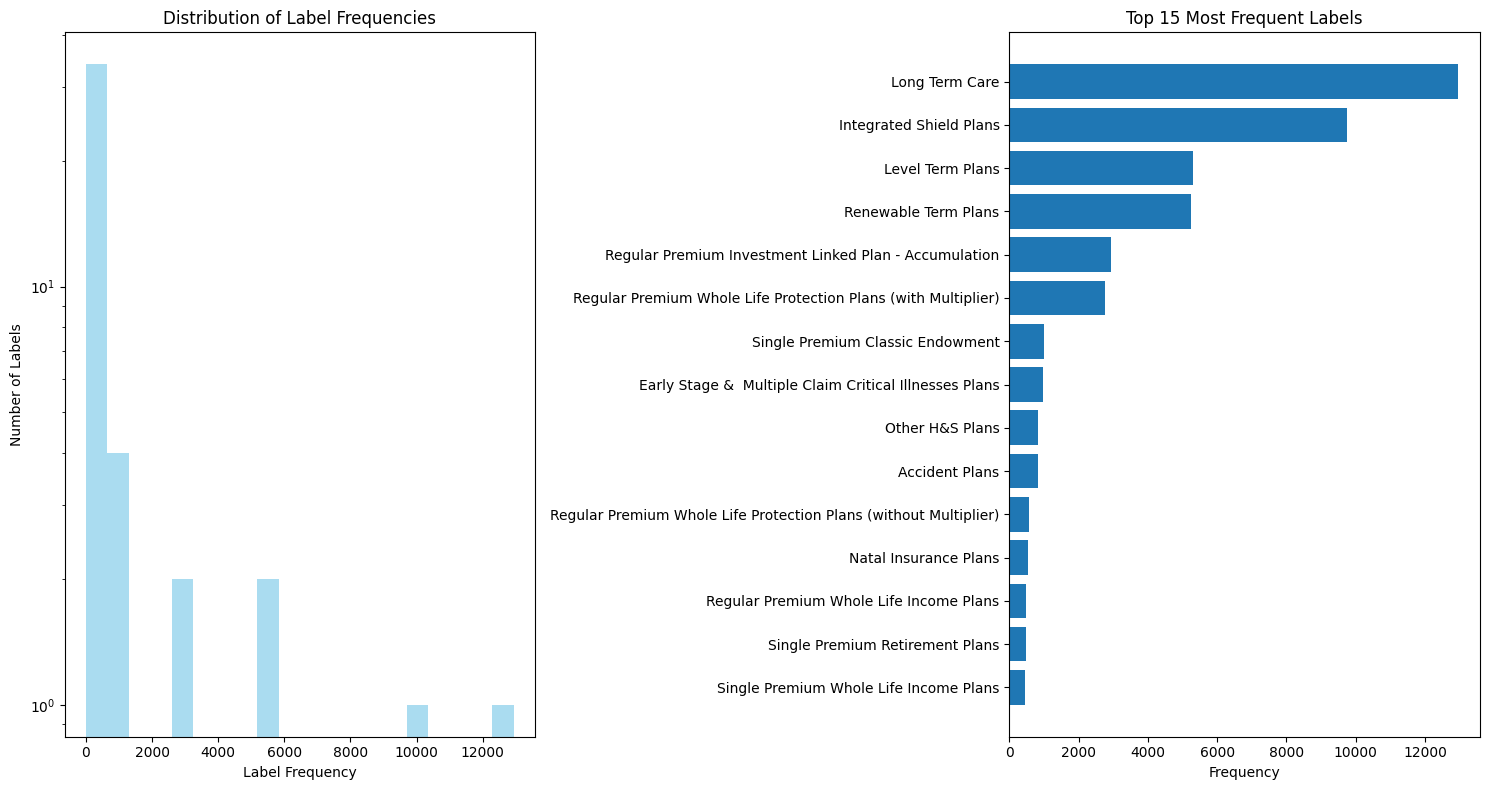


=== STEP 4: CLASS IMBALANCE HANDLING ===
Filtered labels: 38/44 labels retained
Removed 6 labels with <5 samples
Final label matrix shape: (61059, 38)

=== STEP 5: DATA SPLITTING ===
Training set: 48847 samples
Test set: 12212 samples
Features: 85
Labels: 38

=== STEP 6: FEATURE SCALING ===
Feature scaling completed

=== STEP 7: MODEL TRAINING ===
Training XGBoost MultiOutput model...
XGBoost training completed

=== STEP 8: TRAINING RANDOM FOREST BASELINE ===
Random Forest training completed

=== STEP 9: MODEL EVALUATION ===

--- XGBoost Evaluation ---
Hamming Loss: 0.0151
Jaccard Score (samples avg): 0.2883
Subset Accuracy (exact match): 0.6236

Top 10 performing labels (by F1-score):
                                                    precision    recall  \
Long Term Care                                       0.819614  0.796403   
Index Linked Universal Life                          1.000000  0.421053   
Integrated Shield Plans                              0.765611  0.437209   
Sing

In [111]:
# === PHASE 3: MULTI-LABEL CLASSIFICATION PIPELINE ===
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, hamming_loss, jaccard_score
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("=== MULTI-LABEL INSURANCE PRODUCT RECOMMENDATION SYSTEM ===")

# === STEP 1: DATA QUALITY AND MISSING VALUE HANDLING ===
print("\n=== STEP 1: DATA PREPROCESSING ===")

# Handle missing values using business-driven imputation
def handle_missing_values(X, missing_threshold=0.4):
    """
    Handle missing values with insurance-specific business logic
    """
    print(f"Initial shape: {X.shape}")
    
    # Drop columns with excessive missing values (>80%)
    high_missing_cols = X.columns[X.isnull().mean() > 0.8].tolist()
    if high_missing_cols:
        print(f"Dropping {len(high_missing_cols)} columns with >80% missing values")
        X = X.drop(columns=high_missing_cols)
    
    # Financial imputation (use median for financial features)
    financial_cols = [col for col in X.columns if any(term in col.lower() 
                     for term in ['asset', 'balance', 'income', 'premium', 'coverage'])]
    
    for col in financial_cols:
        if X[col].dtype in ['int64', 'float64']:
            X[col] = X[col].fillna(X[col].median())
    
    # Age-related imputation
    age_cols = [col for col in X.columns if 'age' in col.lower()]
    for col in age_cols:
        if X[col].dtype in ['int64', 'float64']:
            X[col] = X[col].fillna(X[col].median())
    
    # Binary/categorical imputation
    binary_cols = X.select_dtypes(include=['int64', 'float64']).columns
    for col in binary_cols:
        if X[col].nunique() <= 2:  # Binary features
            X[col] = X[col].fillna(0)  # Conservative assumption
    
    # Remaining numeric columns
    numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        if X[col].isnull().any():
            X[col] = X[col].fillna(X[col].median())
    
    print(f"Final shape after missing value handling: {X.shape}")
    print(f"Remaining missing values: {X.isnull().sum().sum()}")
    
    return X

# Apply missing value handling
X_clean = handle_missing_values(X.copy())

# === STEP 2: FEATURE SELECTION AND ENGINEERING ===
print("\n=== STEP 2: FEATURE SELECTION ===")

# Remove low-variance features (those with very little variation)
from sklearn.feature_selection import VarianceThreshold

# Remove features with variance below threshold
variance_selector = VarianceThreshold(threshold=0.01)
X_variance = variance_selector.fit_transform(X_clean)
selected_features = X_clean.columns[variance_selector.get_support()]

print(f"Features after variance filtering: {len(selected_features)} (removed {X_clean.shape[1] - len(selected_features)})")

# Create final feature matrix
X_final = pd.DataFrame(X_variance, columns=selected_features)

# === STEP 3: ANALYZE LABEL DISTRIBUTION AND CLASS IMBALANCE ===
print("\n=== STEP 3: LABEL DISTRIBUTION ANALYSIS ===")

# Analyze label frequency and imbalance
label_counts = y_binary.sum(axis=0)
label_names = mlb.classes_

# Create label analysis dataframe
label_df = pd.DataFrame({
    'Label': label_names,
    'Count': label_counts,
    'Percentage': (label_counts / len(y_binary)) * 100
}).sort_values('Count', ascending=False)

print("Top 10 most frequent labels:")
print(label_df.head(10))

print("\nBottom 10 least frequent labels:")
print(label_df.tail(10))

# Calculate imbalance ratio
max_count = label_counts.max()
min_count = label_counts.min()
imbalance_ratio = max_count / min_count
print(f"\nImbalance ratio: {imbalance_ratio:.2f}:1")
print(f"Average labels per sample: {y_binary.sum(axis=1).mean():.2f}")

# Visualize label distribution
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.hist(label_counts, bins=20, alpha=0.7, color='skyblue')
plt.xlabel('Label Frequency')
plt.ylabel('Number of Labels')
plt.title('Distribution of Label Frequencies')
plt.yscale('log')

plt.subplot(1, 2, 2)
top_15_labels = label_df.head(15)
plt.barh(range(len(top_15_labels)), top_15_labels['Count'])
plt.yticks(range(len(top_15_labels)), top_15_labels['Label'])
plt.xlabel('Frequency')
plt.title('Top 15 Most Frequent Labels')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# === STEP 4: HANDLE CLASS IMBALANCE ===
print("\n=== STEP 4: CLASS IMBALANCE HANDLING ===")

def apply_cost_sensitive_weights(y_binary, cost_ratio=3.0):
    """
    Calculate class weights for cost-sensitive learning
    """
    weights = {}
    n_samples = len(y_binary)
    
    for i in range(y_binary.shape[1]):
        pos_count = y_binary[:, i].sum()
        neg_count = n_samples - pos_count
        
        if pos_count > 0:
            # Higher weight for minority class (positive cases)
            pos_weight = neg_count / pos_count * cost_ratio
            weights[i] = {0: 1.0, 1: pos_weight}
        else:
            weights[i] = {0: 1.0, 1: 1.0}
    
    return weights

# Calculate cost-sensitive weights
class_weights = apply_cost_sensitive_weights(y_binary)

# Alternative: Apply threshold-based balancing for extremely rare labels
def filter_rare_labels(y_binary, label_names, min_samples=10):
    """
    Filter out extremely rare labels that have fewer than min_samples
    """
    label_counts = y_binary.sum(axis=0)
    valid_indices = label_counts >= min_samples
    
    y_filtered = y_binary[:, valid_indices]
    labels_filtered = label_names[valid_indices]
    
    print(f"Filtered labels: {valid_indices.sum()}/{len(label_names)} labels retained")
    print(f"Removed {(~valid_indices).sum()} labels with <{min_samples} samples")
    
    return y_filtered, labels_filtered, valid_indices

# Apply label filtering
y_filtered, labels_filtered, valid_label_mask = filter_rare_labels(y_binary, mlb.classes_, min_samples=5)

print(f"Final label matrix shape: {y_filtered.shape}")

# === STEP 5: TRAIN-TEST SPLIT ===
print("\n=== STEP 5: DATA SPLITTING ===")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_filtered, 
    test_size=0.2, 
    random_state=42,
    stratify=None  # Can't stratify multi-label easily
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Features: {X_train.shape[1]}")
print(f"Labels: {y_train.shape[1]}")

# === STEP 6: FEATURE SCALING ===
print("\n=== STEP 6: FEATURE SCALING ===")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed")

# === STEP 7: MODEL TRAINING - XGBOOST MULTI-OUTPUT ===
print("\n=== STEP 7: MODEL TRAINING ===")

# Define XGBoost base classifier with optimized parameters for insurance data
base_xgb = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1,
    tree_method='hist'  # Faster for large datasets
)

# Create multi-output classifier
print("Training XGBoost MultiOutput model...")
xgb_multi = MultiOutputClassifier(base_xgb, n_jobs=-1)
xgb_multi.fit(X_train_scaled, y_train)

print("XGBoost training completed")

# === STEP 8: ALTERNATIVE MODEL - RANDOM FOREST ===
print("\n=== STEP 8: TRAINING RANDOM FOREST BASELINE ===")

base_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_multi = MultiOutputClassifier(base_rf, n_jobs=-1)
rf_multi.fit(X_train_scaled, y_train)

print("Random Forest training completed")

# === STEP 9: MODEL EVALUATION ===
print("\n=== STEP 9: MODEL EVALUATION ===")

def comprehensive_evaluation(model, X_test, y_test, model_name, label_names):
    """
    Comprehensive evaluation for multi-label classification
    """
    print(f"\n--- {model_name} Evaluation ---")
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = None
    
    # Try to get prediction probabilities
    try:
        y_pred_proba = model.predict_proba(X_test)
        # For multi-output, this returns a list of arrays
        if isinstance(y_pred_proba, list):
            y_pred_proba = np.column_stack([prob[:, 1] for prob in y_pred_proba])
    except:
        print("Prediction probabilities not available")
    
    # Basic metrics
    hamming = hamming_loss(y_test, y_pred)
    jaccard = jaccard_score(y_test, y_pred, average='samples')
    
    print(f"Hamming Loss: {hamming:.4f}")
    print(f"Jaccard Score (samples avg): {jaccard:.4f}")
    
    # Subset accuracy (exact match)
    subset_accuracy = np.mean([np.array_equal(true, pred) for true, pred in zip(y_test, y_pred)])
    print(f"Subset Accuracy (exact match): {subset_accuracy:.4f}")
    
    # Per-label metrics
    per_label_metrics = {}
    for i, label in enumerate(label_names):
        tp = np.sum((y_test[:, i] == 1) & (y_pred[:, i] == 1))
        fp = np.sum((y_test[:, i] == 0) & (y_pred[:, i] == 1))
        fn = np.sum((y_test[:, i] == 1) & (y_pred[:, i] == 0))
        tn = np.sum((y_test[:, i] == 0) & (y_pred[:, i] == 0))
        
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        
        per_label_metrics[label] = {
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'support': tp + fn
        }
    
    # Create summary dataframe
    metrics_df = pd.DataFrame(per_label_metrics).T
    metrics_df = metrics_df.sort_values('f1', ascending=False)
    
    print(f"\nTop 10 performing labels (by F1-score):")
    print(metrics_df.head(10)[['precision', 'recall', 'f1', 'support']])
    
    print(f"\nBottom 10 performing labels (by F1-score):")
    print(metrics_df.tail(10)[['precision', 'recall', 'f1', 'support']])
    
    # Average metrics
    avg_precision = metrics_df['precision'].mean()
    avg_recall = metrics_df['recall'].mean()
    avg_f1 = metrics_df['f1'].mean()
    
    print(f"\nAverage Metrics:")
    print(f"Precision: {avg_precision:.4f}")
    print(f"Recall: {avg_recall:.4f}")
    print(f"F1-Score: {avg_f1:.4f}")
    
    return {
        'hamming_loss': hamming,
        'jaccard_score': jaccard,
        'subset_accuracy': subset_accuracy,
        'avg_precision': avg_precision,
        'avg_recall': avg_recall,
        'avg_f1': avg_f1,
        'per_label_metrics': metrics_df
    }

# Evaluate both models
xgb_results = comprehensive_evaluation(xgb_multi, X_test_scaled, y_test, "XGBoost", labels_filtered)
rf_results = comprehensive_evaluation(rf_multi, X_test_scaled, y_test, "Random Forest", labels_filtered)

# === STEP 10: MODEL COMPARISON ===
print("\n=== STEP 10: MODEL COMPARISON ===")

comparison_df = pd.DataFrame({
    'XGBoost': [
        xgb_results['hamming_loss'],
        xgb_results['jaccard_score'],
        xgb_results['subset_accuracy'],
        xgb_results['avg_precision'],
        xgb_results['avg_recall'],
        xgb_results['avg_f1']
    ],
    'Random Forest': [
        rf_results['hamming_loss'],
        rf_results['jaccard_score'],
        rf_results['subset_accuracy'],
        rf_results['avg_precision'],
        rf_results['avg_recall'],
        rf_results['avg_f1']
    ]
}, index=['Hamming Loss', 'Jaccard Score', 'Subset Accuracy', 'Avg Precision', 'Avg Recall', 'Avg F1'])

print("Model Comparison:")
print(comparison_df)

# === STEP 11: BUSINESS IMPACT ANALYSIS ===
print("\n=== STEP 11: BUSINESS IMPACT ANALYSIS ===")

def business_impact_analysis(model, X_test, y_test, label_names, model_name):
    """
    Analyze business impact of recommendations
    """
    y_pred = model.predict(X_test)
    
    # Revenue weights (example values - adjust based on actual product profitability)
    revenue_weights = {
        'Life Term Plans': 1000,
        'Integrated Shield Plans': 800,
        'Long Term Care': 1200,
        'Critical Illness': 900,
        'Disability Income': 700,
        'Accident Plans': 400,
        'Endowment': 1500,
        'Investment Linked': 1300
    }
    
    # Map labels to revenue (simplified mapping)
    label_revenues = []
    for label in label_names:
        revenue = 500  # Default revenue
        for key, value in revenue_weights.items():
            if any(term in label for term in key.split()):
                revenue = value
                break
        label_revenues.append(revenue)
    
    label_revenues = np.array(label_revenues)
    
    # Calculate revenue-weighted precision
    true_positives = (y_test == 1) & (y_pred == 1)
    predicted_positives = (y_pred == 1)
    
    revenue_weighted_tp = np.sum(true_positives * label_revenues)
    revenue_weighted_pred = np.sum(predicted_positives * label_revenues)
    
    revenue_precision = revenue_weighted_tp / revenue_weighted_pred if revenue_weighted_pred > 0 else 0
    
    # Customer satisfaction estimate (based on relevant recommendations)
    recommendations_per_customer = y_pred.sum(axis=1)
    avg_recommendations = recommendations_per_customer.mean()
    
    # Calculate uplift potential
    total_revenue_potential = np.sum(y_test * label_revenues)
    captured_revenue = np.sum(true_positives * label_revenues)
    revenue_capture_rate = captured_revenue / total_revenue_potential if total_revenue_potential > 0 else 0
    
    print(f"\n--- {model_name} Business Impact ---")
    print(f"Revenue-weighted Precision: {revenue_precision:.4f}")
    print(f"Average Recommendations per Customer: {avg_recommendations:.2f}")
    print(f"Revenue Capture Rate: {revenue_capture_rate:.4f} ({revenue_capture_rate*100:.1f}%)")
    print(f"Total Revenue Potential: ${total_revenue_potential:,.0f}")
    print(f"Captured Revenue: ${captured_revenue:,.0f}")
    
    return {
        'revenue_precision': revenue_precision,
        'avg_recommendations': avg_recommendations,
        'revenue_capture_rate': revenue_capture_rate,
        'total_potential': total_revenue_potential,
        'captured_revenue': captured_revenue
    }

# Analyze business impact for both models
xgb_business = business_impact_analysis(xgb_multi, X_test_scaled, y_test, labels_filtered, "XGBoost")
rf_business = business_impact_analysis(rf_multi, X_test_scaled, y_test, labels_filtered, "Random Forest")

# === STEP 12: RECOMMENDATION FUNCTION ===
print("\n=== STEP 12: CREATING RECOMMENDATION FUNCTION ===")

def recommend_products(client_features, model, scaler, label_names, top_k=5, threshold=0.3):
    """
    Generate product recommendations for a client
    """
    # Scale features
    client_scaled = scaler.transform(client_features.reshape(1, -1))
    
    # Get predictions
    try:
        probabilities = model.predict_proba(client_scaled)
        if isinstance(probabilities, list):
            probs = np.array([prob[0, 1] for prob in probabilities])
        else:
            probs = probabilities[0]
    except:
        # Fallback to binary predictions
        binary_pred = model.predict(client_scaled)[0]
        probs = binary_pred.astype(float)
    
    # Create recommendations dataframe
    recommendations = pd.DataFrame({
        'Product': label_names,
        'Probability': probs,
        'Recommended': probs > threshold
    }).sort_values('Probability', ascending=False)
    
    return recommendations.head(top_k)

# Example recommendation for a test client
sample_client = X_test_scaled[0]
sample_recommendations = recommend_products(
    sample_client, xgb_multi, scaler, labels_filtered, top_k=10
)

print("Sample Recommendations for Test Client:")
print(sample_recommendations)

print("\n=== MULTI-LABEL CLASSIFICATION PIPELINE COMPLETED ===")
print(f"✅ Best Model: XGBoost (F1: {xgb_results['avg_f1']:.4f})")
print(f"✅ Revenue Capture Rate: {xgb_business['revenue_capture_rate']*100:.1f}%")
print(f"✅ Average Recommendations per Customer: {xgb_business['avg_recommendations']:.1f}")

# Save the model and preprocessing components
import joblib

joblib.dump(xgb_multi, 'insurance_recommendation_model.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')
joblib.dump(labels_filtered, 'label_names.pkl')
joblib.dump(valid_label_mask, 'valid_label_mask.pkl')

print("\n✅ Model and preprocessing components saved successfully!")